### **Problem Statement:**

In the highly competitive telecommunications industry, retaining existing customers is as critical as acquiring new ones. Customer churn, the phenomenon where customers discontinue using a service, can significantly impact a company’s revenue and growth. For telecom providers, understanding and predicting customer churn is essential to developing targeted retention strategies and improving customer satisfaction.

In this project, we aim to develop a predictive model that identifies customers likely to churn based on historical data. The dataset includes various attributes related to customer demographics, account information, usage behavior, and service subscription details. Specifically, features include customer demographic attributes (such as gender, SeniorCitizen status, Partner, Dependents), service usage patterns (tenure, PhoneService, InternetService type, MonthlyCharges), and customer engagement indicators (OnlineSecurity, TechSupport, Contract type). The target variable, Churn, indicates whether a customer has discontinued the service (Yes) or remains active (No).

The primary objective of this project is to accurately predict customer churn using machine learning algorithms. With a well-performing model, telecom companies can identify high-risk customers, allowing for timely interventions like customized offers, improved customer support, or other retention strategies. This predictive approach is expected to reduce churn rates and contribute to customer lifetime value.

### **Column Names and Description**

**customerID:** Unique identifier for each customer.

**gender:** Gender of the customer (Male/Female).

**SeniorCitizen:** Indicates if the customer is a senior citizen (1 = Yes, 0 = No).

**Partner:** Indicates if the customer has a partner (Yes/No).

**Dependents:** Indicates if the customer has dependents (Yes/No).

**tenure:** Number of months the customer has been with the company.

**PhoneService:** Indicates if the customer has phone service (Yes/No).

**MultipleLines:** Indicates if the customer has multiple phone lines (Yes/No/No phone service).

**InternetService:** Type of internet service subscribed by the customer (DSL, Fiber optic, No).

**OnlineSecurity:** Indicates if the customer has online security service (Yes/No/No internet service).

**OnlineBackup:** Indicates if the customer has online backup service (Yes/No/No internet service).

**DeviceProtection:** Indicates if the customer has device protection service (Yes/No/No internet service).

**TechSupport:** Indicates if the customer has tech support service (Yes/No/No internet service).

**StreamingTV:** Indicates if the customer has streaming TV service (Yes/No/No internet service).

**StreamingMovies:** Indicates if the customer has streaming movies service (Yes/No/No internet service).

**Contract:** Type of contract term (Month-to-month, One year, Two year).

**PaperlessBilling:** Indicates if the customer has opted for paperless billing (Yes/No).

**PaymentMethod:** Method used by the customer for payment (Electronic check, Mailed check, Bank transfer, Credit card).

**MonthlyCharges:** Monthly amount charged to the customer.

**TotalCharges:** Total amount charged to the customer to date.

**Churn:** Indicates if the customer has left the service (Yes/No).

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix,classification_report,recall_score,precision_score,accuracy_score,f1_score,cohen_kappa_score)
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')

# **Load the Dataset**

In [2]:
data = pd.read_csv('Telecom Customers Churn.csv')

* Setting CustomerID as index

In [3]:
data.set_index('customerID',inplace=True)

In [4]:
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Dimensions of the Dataset**

In [5]:
print(f"Number of Rows: {data.shape[0]}\nNumber of Columns: {data.shape[1]}")

Number of Rows: 7043
Number of Columns: 20


### **Datatypes**

In [6]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
data['TotalCharges'] = np.where((data['TotalCharges']==' '),None,data['TotalCharges'])
data['TotalCharges'] = data['TotalCharges'].astype(float)

# **Descriptive Analysis**

In [8]:
data[['tenure','MonthlyCharges','TotalCharges']].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


<div style="background-color: #ffff99; padding: 10px;">

* **Tenure**: Range for tenure is 72 which indicates that data might be widely spread. Iqr is 46 which indicates there might be moderate variability at the centre 50% of the data. Median is closer to q1 which indicates data might be right skewed.

* **MonthlyCharges**: Range for MonthlyCharges is ~100 which indicates that data might be widely spread. Iqr is ~54 which indicates there might be moderate variability at the centre 50% of the data. Median is closer to q3 which indicates data might be left skewed.

* **TotalCharges**: Range for Total Charges is ~8666 which indicates data might be widely spread. Iqr is ~3393 which indicates high indicates there might be high variability at the centre 50% of the data. Median is closer to q1 which data might be right skewed. The Maximum value is far from q3 indicating outliers in the data.

# **Data Exploration**

In [9]:
num_cols = ['tenure','MonthlyCharges','TotalCharges']
cat_cols = data.drop(columns=['tenure','MonthlyCharges','TotalCharges']).columns

## **Visualization**

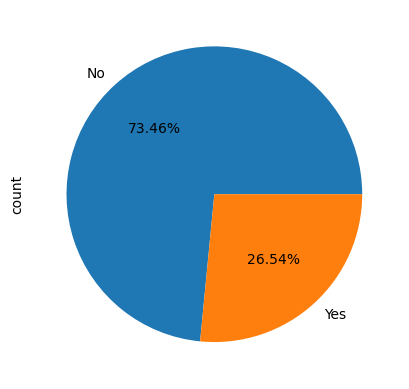

In [10]:
# Churn Analysis
data['Churn'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

<div style="background-color: #ffff99; padding: 10px;">
    
#### **Inference:**
* From the chart we can say that about **73.46%** of the customers have been retained by the company while **25.54%** customers have switched the company. This shows imbalance in the target column.

### **Univariate Analysis**

* Numeric Columns

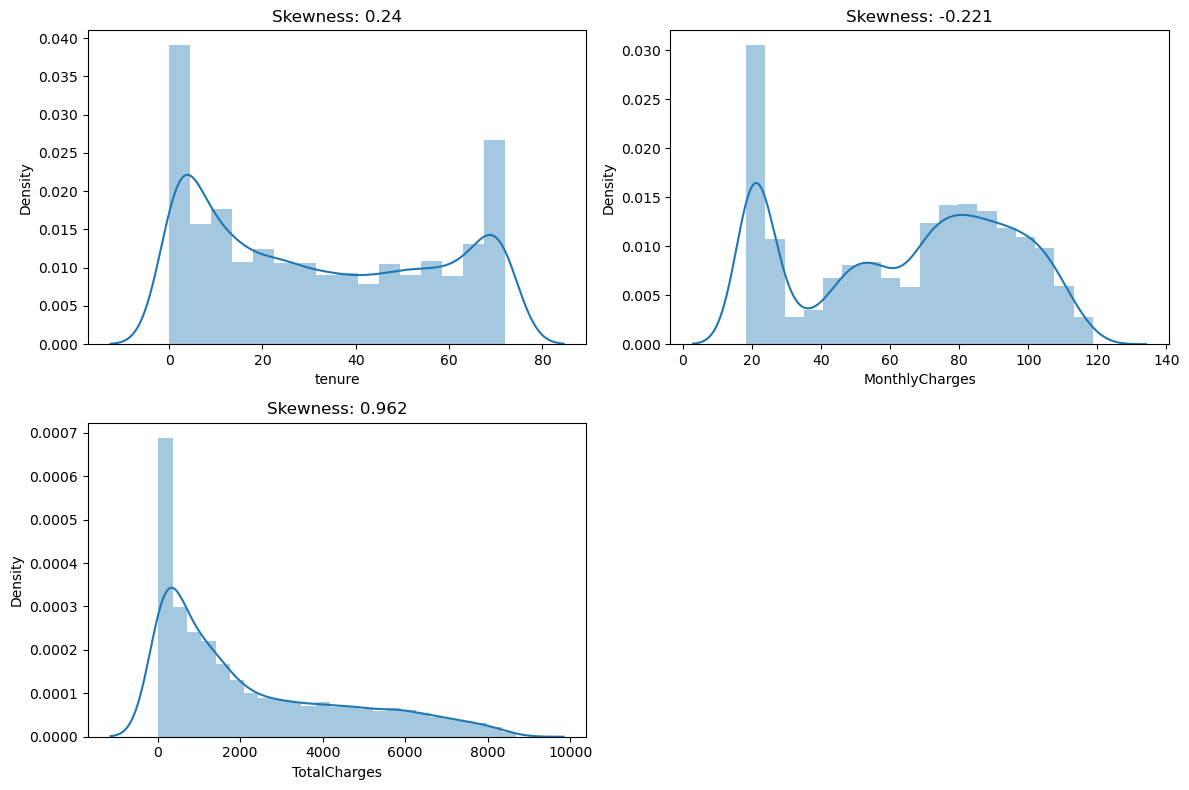

In [11]:
t = 1
plt.figure(figsize=(12,8))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.distplot(data[i])
    plt.title(f"Skewness: {round(data[i].skew(),3)}")
    t += 1
plt.tight_layout()
plt.show()

<div style="background-color: #ffff99; padding: 10px;">
    
#### **Inferences from the distplot:**

* As per the graph the data in Tenure and MonthlyCharges is normally distributed.
* The TotalCharges graph is right skewed which indicates the totalcharges for some of the customers are higher as comapred to other customers.

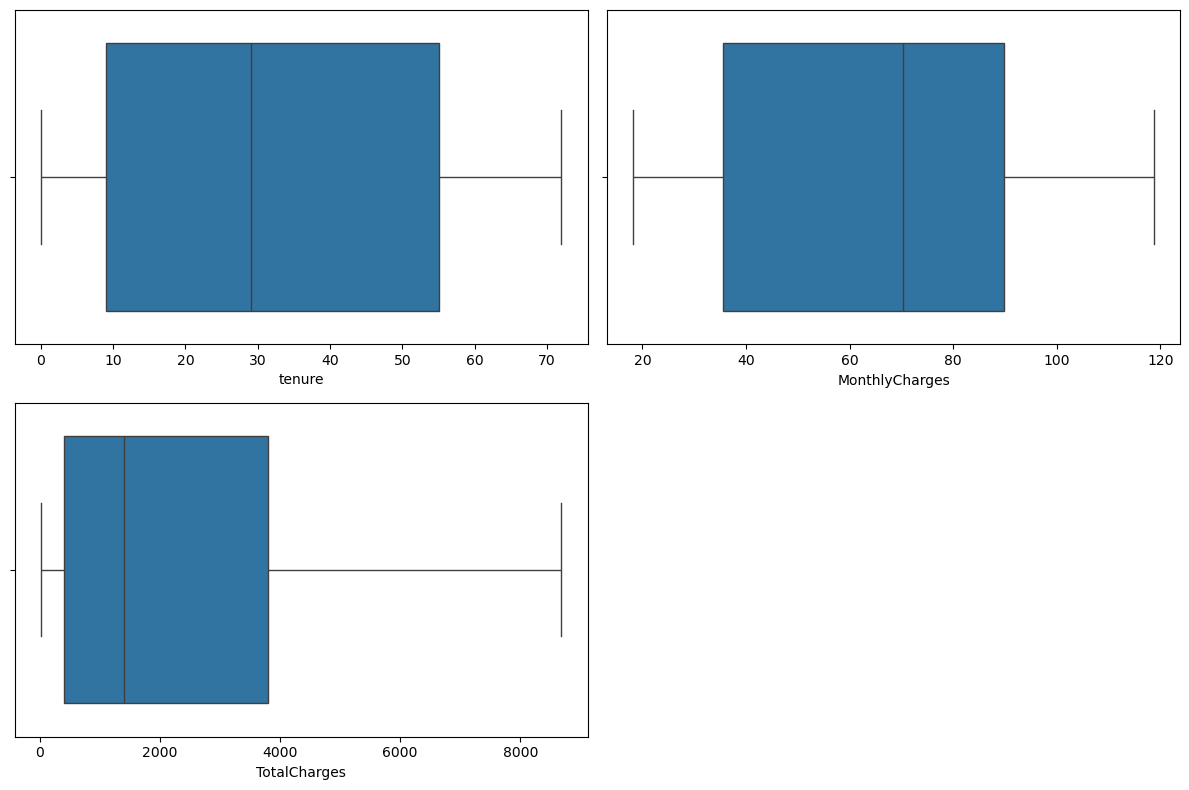

In [12]:
t = 1
plt.figure(figsize=(12,8))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data[i],orient='h')
    t += 1
plt.tight_layout()
plt.show()

<div style="background-color: #ffff99; padding: 10px;">

#### **Inference**:

* There are no outliers in the data.

* Categorical Columns

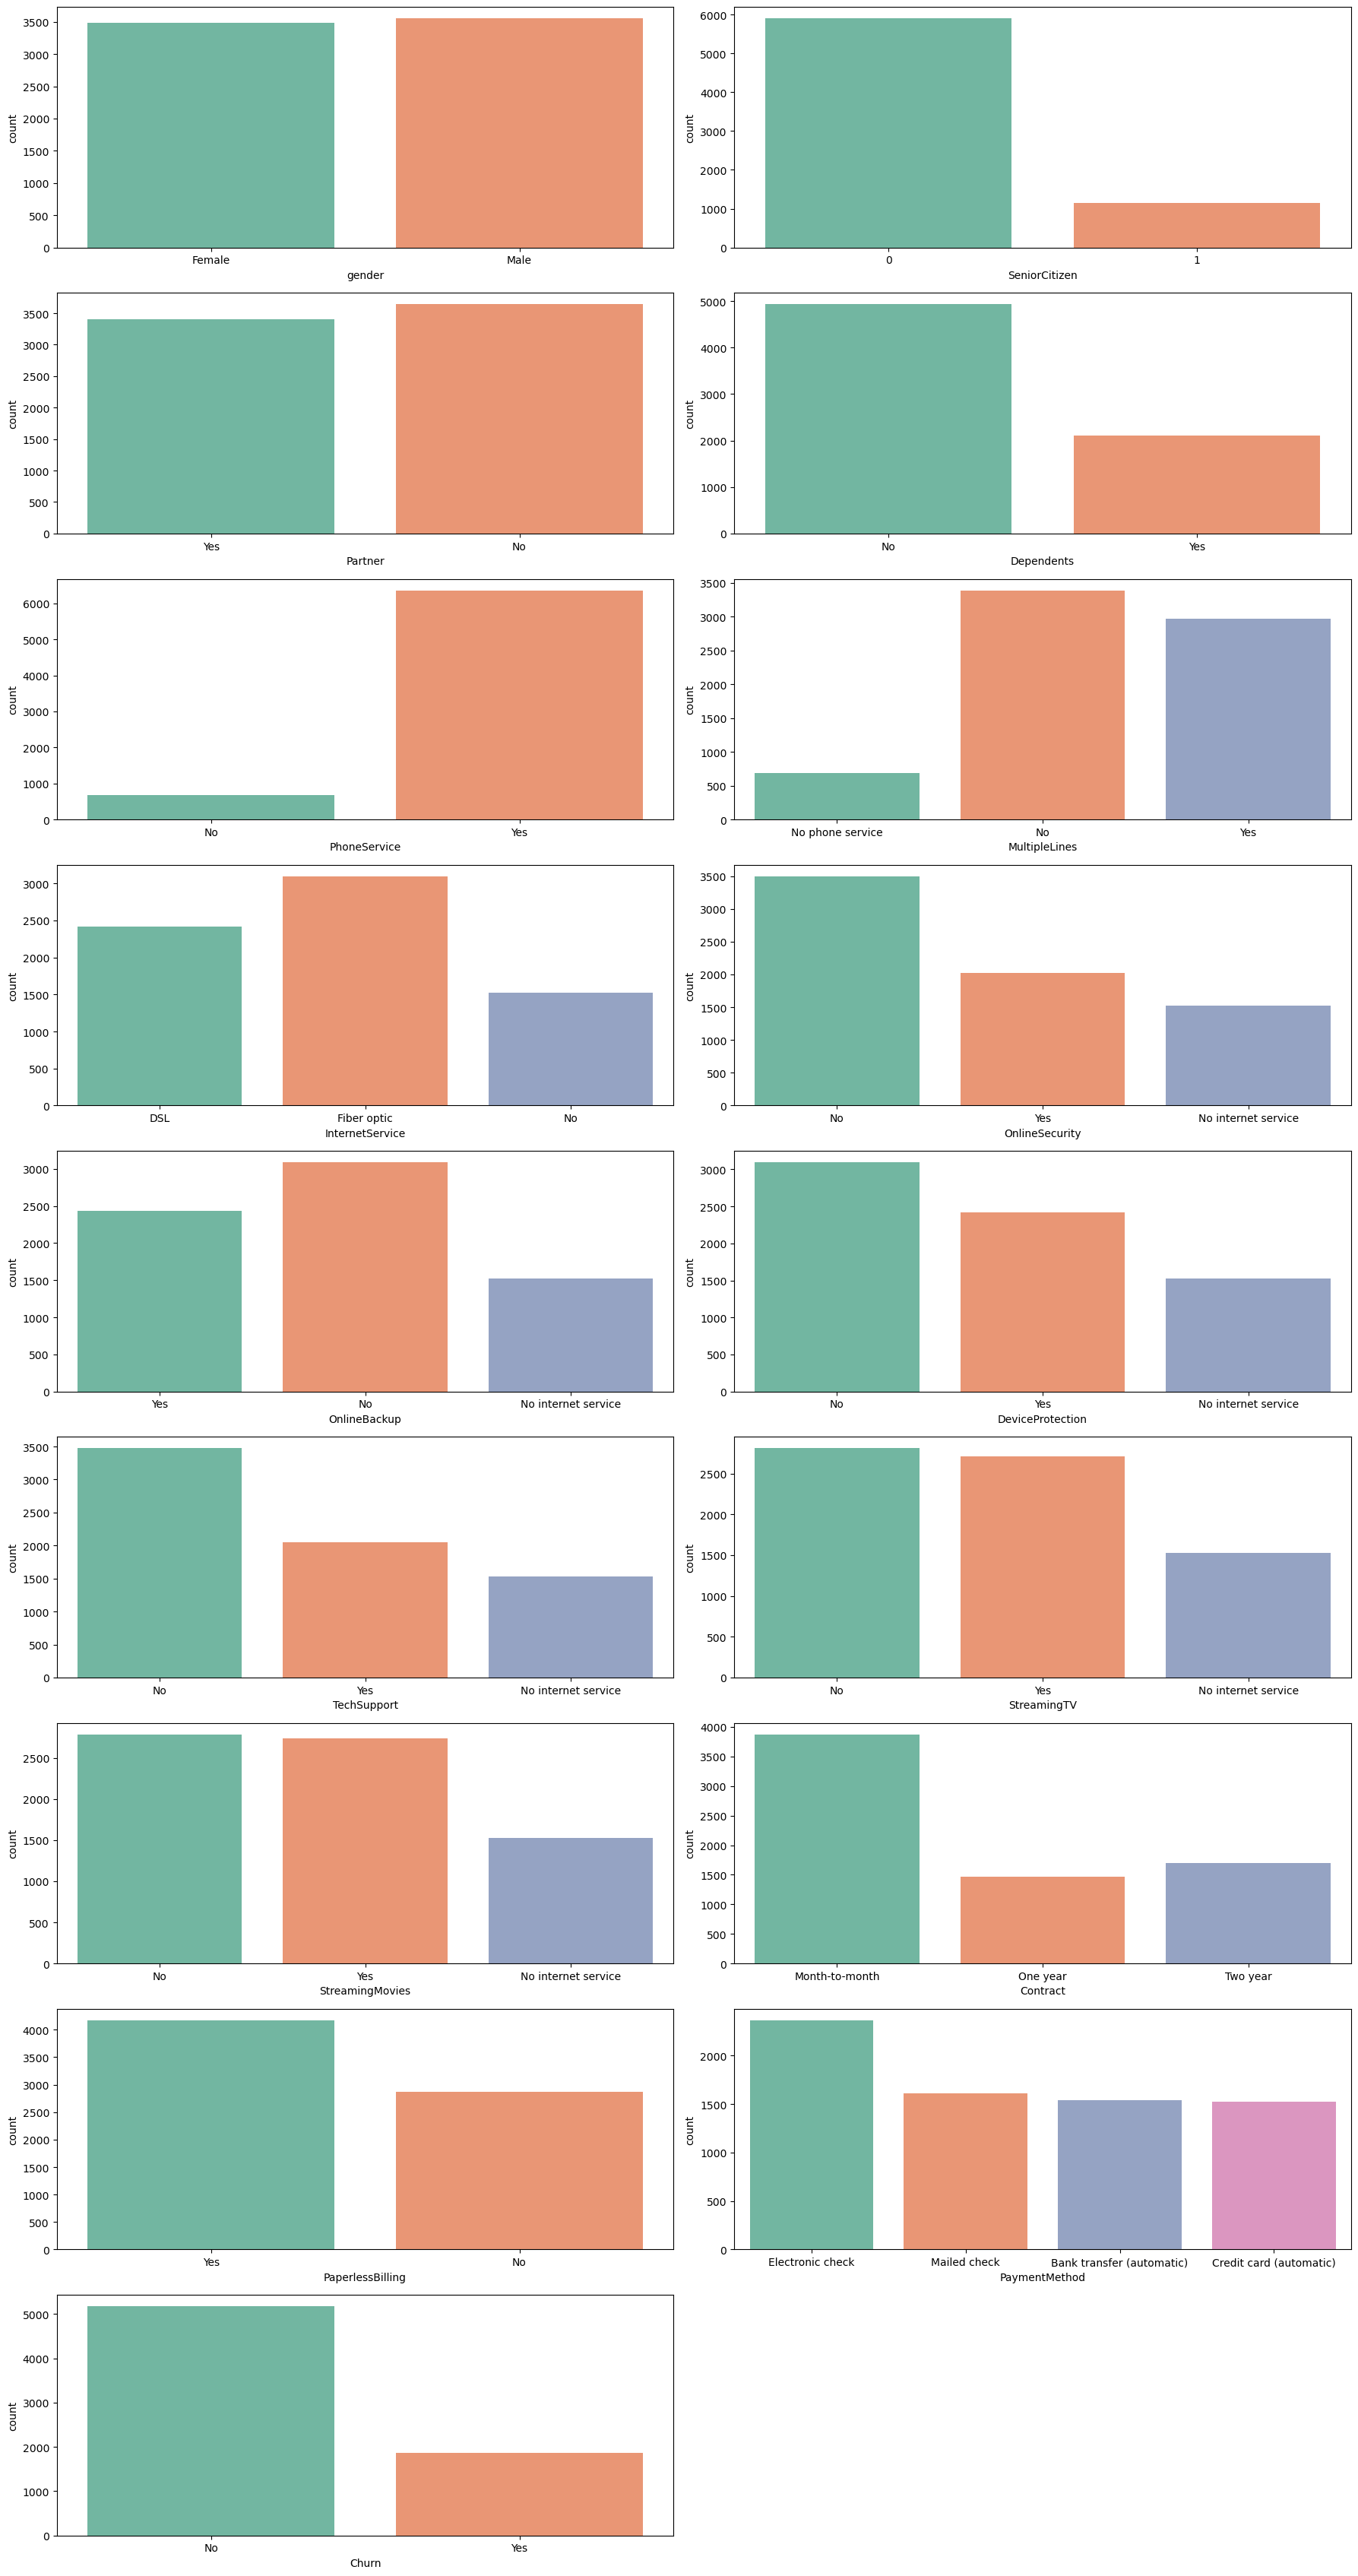

In [13]:
t = 1
plt.figure(figsize=(18,34))
for i in cat_cols:
    plt.subplot(9,2,t)
    sns.countplot(data=data,x=i,palette='Set2')
    t += 1
plt.tight_layout()
plt.show()

<div style="background-color: #ffff99; padding: 10px;">

#### **The inferences from the count plot for the categorical columns reveal some important patterns about the customer base. Let’s break down the insights and what they indicate about the company's services:**

### **1. Customer Demographics**

**Gender**: The nearly equal count of male and female customers suggests that gender distribution is balanced in the customer base, confirming that gender doesn't play a major role in customer targeting.

**Senior Citizen**: Most customers are non-senior citizens, implying that the majority of customers are younger. Services could be tailored to meet the needs of this younger demographic, while focusing on retaining senior customers who are less likely to churn.

**Partners and Dependents**: The fact that more customers are without partners and dependents suggests that the customer base includes many single or independent individuals. This could indicate a need to focus on individual plans rather than family-oriented services.

### **2. Service Adoption**

**Phone Service**: The fact that most customers have opted for PhoneService shows that this is a widely adopted service, but there may still be issues with its quality.

**Multiple Lines**: More customers do not have Multiple Lines, indicating that this might not be a critical service for the majority. The company could explore whether offering value bundles or discounts could incentivize customers to adopt multiple lines.

**Fiber Optics & DSL**: Most customers prefer Fiber Optics over DSL. This preference indicates a shift toward higher-speed internet services.

### **3. Additional Services (Add-ons)**

**Online Security, Backup, and Device Protection**: For all three services (Online Security, Backup, and Device Protection), fewer customers have opted in. This shows a gap in adoption of these services, which could either indicate that customers don’t perceive enough value in them or that they are unaware of the benefits. Offering these as part of bundled packages or running promotional campaigns might increase adoption.

**Tech Support**: Since most customers haven’t taken Tech Support, this service might not be viewed as essential. However, educating customers on the benefits of tech support could help in retaining customers.

### **4. Entertainment & Content**

**Streaming TV & Movies**: The equal split between customers streaming and those not streaming suggests that entertainment services are not a primary driver for many customers. Nonetheless, improving streaming service quality could be beneficial for the customer base that does use these services.

### **5. Contract and Payment Preferences**

**Month-to-Month Contracts & Paperless Billing**: The majority of customers prefer month-to-month contracts and paperless billing, highlighting the need for flexibility and convenience. However, given the higher churn among month-to-month customers, offering benefits or incentives for long-term contracts could be explored.

**Electronic Check**: Since Electronic Check is the most common payment method, streamlining this process and making it hassle-free would improve the overall customer experience.

### **6. Customer Retention**
Majority Retained: The company has been able to retain most of its customers, which is a positive indicator. However, given the churn factors from the previous analysis, improving specific service quality and enhancing customer satisfaction in areas like tech support, security, and payment methods could boost retention further.

### **Conclusion**:
This analysis from the count plots highlights that while the company has a strong customer base, there is room to grow adoption in value-added services like online security and tech support. Improving the quality of widely used services such as Fiber Optics and addressing the needs of the majority who use month-to-month contracts and paperless billing would be key to retaining more customers.

## **Bivariate Analysis**

* Numerical Column vs Numerical Column

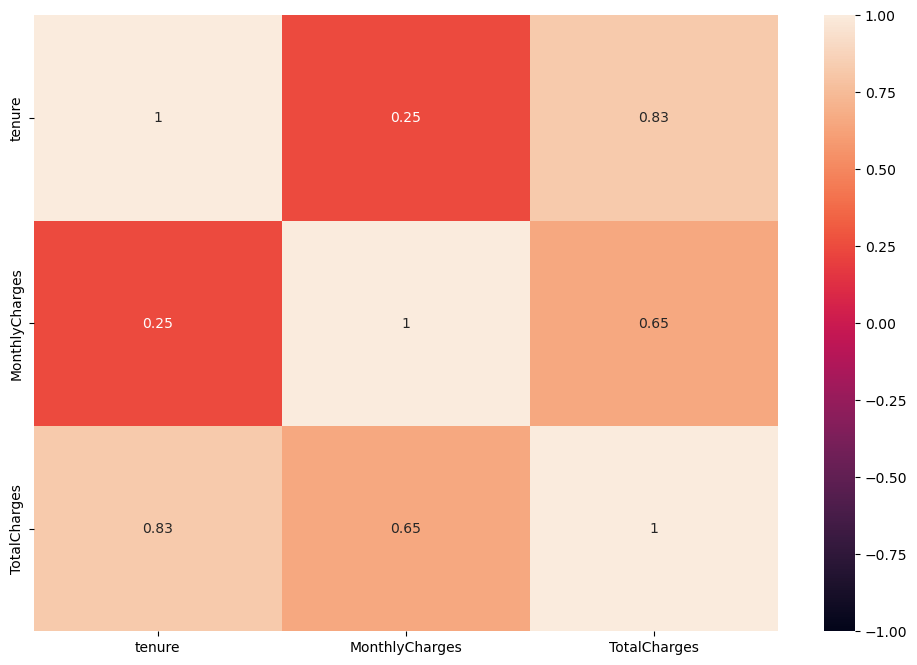

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(data[num_cols].corr(),vmax=1,vmin=-1,annot=True)
plt.show()

<div style="background-color: #ffff99; padding: 10px;">

#### **Inferences from the Correlation Plot:**
* The correlation score of **0.83** between Tenure and Total charges indicates that longer the tenure more will be the charges.
* The correlation score of **0.65** between Total charges and Monthly charges indicate that longer the more monthly charges add up to higher total charges.

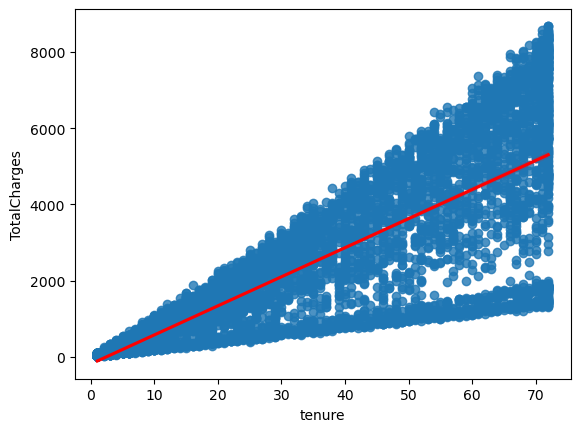

In [15]:
sns.regplot(data=data,x='tenure',y='TotalCharges',line_kws={'color':'red'})
plt.show()

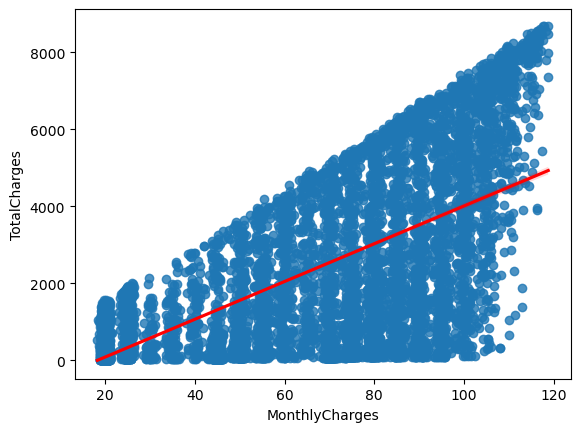

In [16]:
sns.regplot(data=data,x='MonthlyCharges',y='TotalCharges',line_kws={'color':'red'})
plt.show()

<div style="background-color: lightblue; padding: 10px;">

* The Regression line the above graphs show that Total charges has a strong positive relation with Tenure and Monthlycharges

* Numerical Column vs Categorical Column

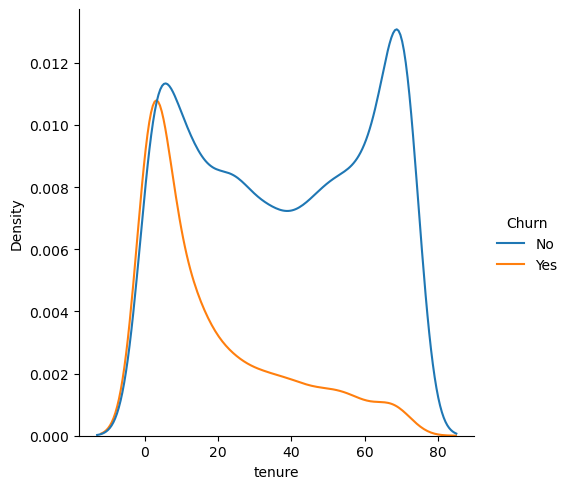

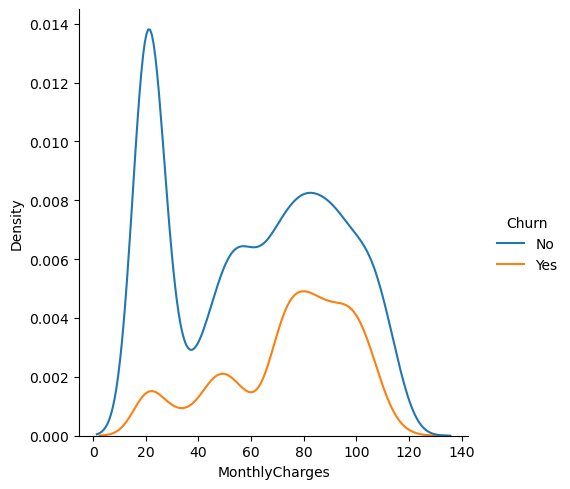

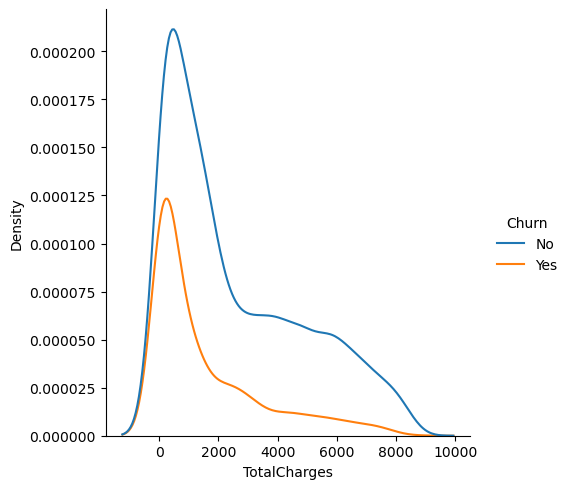

In [17]:
for i in num_cols:
    sns.displot(data=data,x=i,hue='Churn',kind='kde')
    plt.show()

<div style="background-color: #ffff99; padding: 10px;">

#### **The inferences from the displot analysis between numerical columns and the target (churn) column provide some important insights into how tenure and charges influence customer churn. Here's a breakdown:**

### **1. Tenure and Churn**

**Tenure vs. Churn**: As tenure increases, the likelihood of customer churn decreases. This suggests that longer-tenured customers are more loyal, likely because they have developed trust in the company or found the services satisfactory over time. Retention strategies could focus on customers with shorter tenures by offering personalized support or incentives to stay longer.

### **2. Monthly Charges and Churn**

**Monthly Charges vs. Churn**: Churned customers tend to have slightly higher monthly charges compared to those who stayed. This could indicate that customers paying more per month may feel they are not getting enough value for the price, leading to dissatisfaction and eventual churn. The company could consider reviewing its pricing strategy or offering more benefits to high-paying customers to reduce churn.

### **3. Total Charges and Churn**

**Total Charges vs. Churn**: Retained customers have higher total charges, which is largely due to their longer tenure. This is a logical outcome because longer-tenured customers accumulate more total charges over time. The key insight here is that keeping customers longer is financially beneficial for the company, reinforcing the need to reduce churn, particularly in the early stages of a customer's journey.

### **Actionable Insights**:

**Focus on Early Tenure Customers**: Implement targeted retention strategies for customers with lower tenures, such as loyalty programs, personalized offers, or discounts on monthly charges.

**Evaluate High Monthly Charges**: For customers with higher monthly charges, the company should ensure they feel they are receiving sufficient value for their money, either by improving service quality, offering add-ons, or providing premium support.

**Nurture Long-Term Customers**: Since customers with higher tenures are less likely to churn, creating rewards or benefits specifically for long-term customers could further strengthen their loyalty and increase customer lifetime value.

### **Conclusion**:
The relationship between tenure, monthly charges, and total charges with churn suggests that the company should focus on improving satisfaction among customers with higher monthly charges and those with lower tenures, as they are more at risk of churning. Retention strategies should aim at making these customers feel valued and providing them with added benefits.

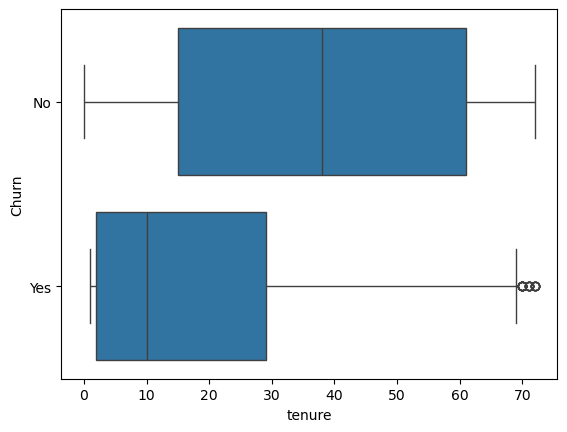

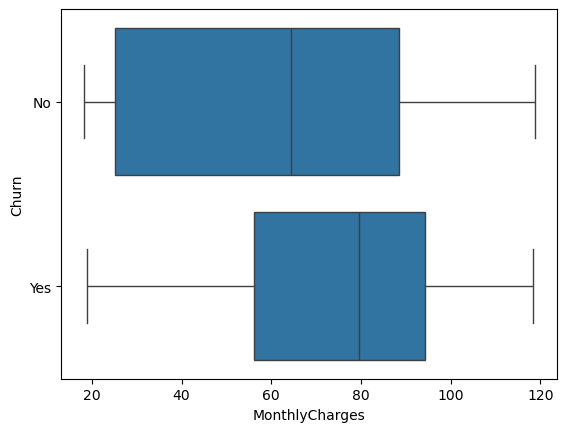

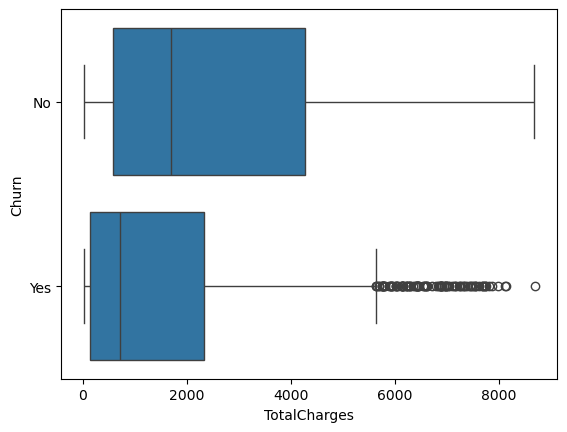

In [18]:
for i in num_cols:
    sns.boxplot(data=data,x=i,y='Churn',orient='h')
    plt.show()

<div style="background-color: #ffff99; padding: 10px;">

#### **The inferences from the boxplot analysis provide additional insights into the relationship between numerical variables (tenure and charges) and customer churn. Here's a breakdown**:

### **1. Tenure and Churn (Boxplot Insights)**

**Tenure of Non-Churn vs. Churn Customers**: The boxplot clearly shows that non-churn customers generally have much longer tenure compared to churn customers. This reinforces the finding that customers who stay with the company longer are less likely to churn.

**Outliers for Tenure**: Despite the general trend, the presence of outliers indicates that some customers with higher tenure have still switched companies. These customers could have been dissatisfied with a specific aspect of the service or faced an issue that wasn't resolved, despite their long relationship with the company. It suggests that even long-tenured customers are not immune to churn if key issues aren't addressed.

### **2. Total Charges and Churn (Boxplot Insights)**

**Total Charges of Churn vs. Non-Churn Customers**: The total charges for churn customers are generally lower than for non-churn customers, which aligns with the idea that longer-tenured customers accumulate higher total charges. However, the boxplot also shows extreme outliers for churn customers with very high total charges.

**Outliers for Total Charges**: These outliers may correspond to customers who had long tenures and, therefore, accumulated high total charges but still decided to churn. This could indicate that even high-revenue customers may be at risk of churn if they encounter service issues, feel underappreciated, or perceive that their monthly charges are not providing sufficient value.

## **Key Takeaways and Actions**:

**Monitor Long-Tenured Customers (Outliers)**: Even though long-tenured customers are typically more loyal, the presence of outliers suggests that these customers are still at risk of churning. The company should closely monitor this segment and ensure that any issues or complaints are quickly addressed to prevent churn.

**Prevent Churn Among High-Value Customers**: The high total charges among some churned customers highlight the importance of retention strategies for high-value customers. Proactively engaging with these customers by offering premium support, loyalty rewards, or personalized plans could help retain them.

**Identify and Address Root Causes of Churn**: For customers who churn despite high tenure or charges, it’s important to conduct surveys or exit interviews to understand the specific reasons behind their decision to leave. This feedback can help the company improve its services and prevent future churn.

### **Conclusion**:
The boxplot analysis highlights that while tenure and total charges are strong indicators of customer loyalty, outliers show that even long-term, high-paying customers can churn. The company should focus on personalized retention strategies and quickly address dissatisfaction among its most valuable customers.

* Categorical Column vs Categorical Column

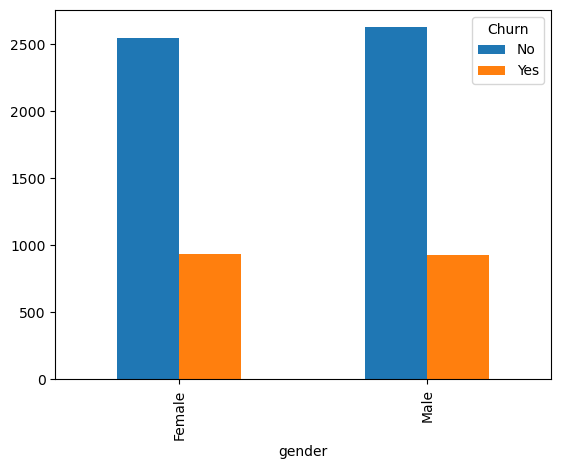

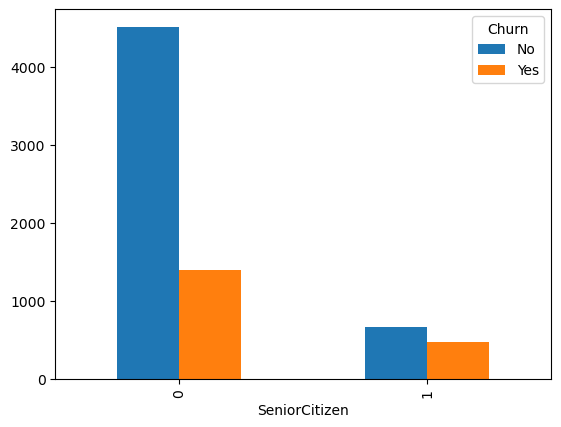

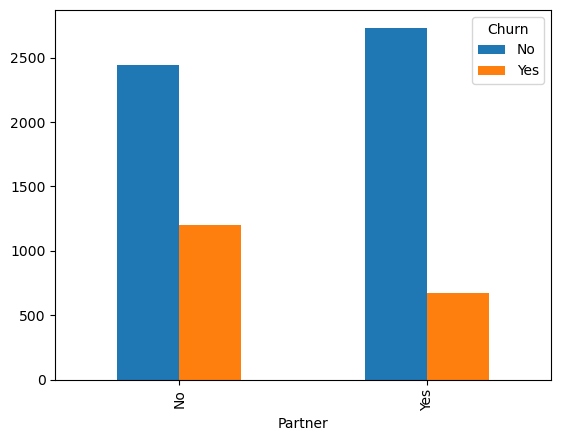

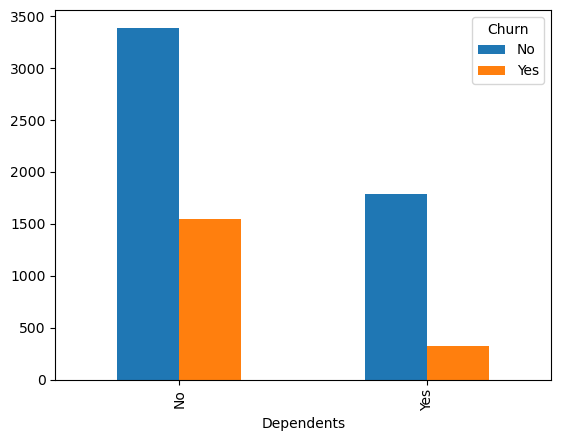

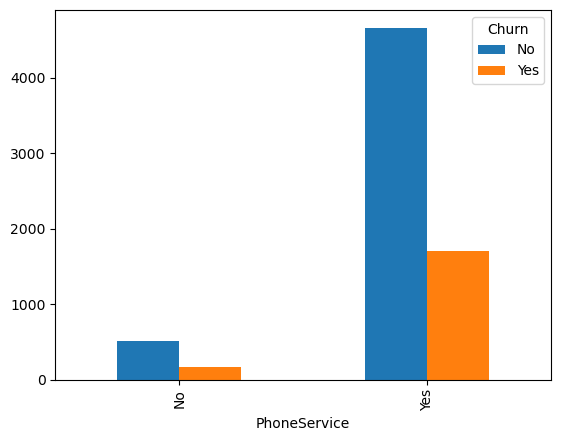

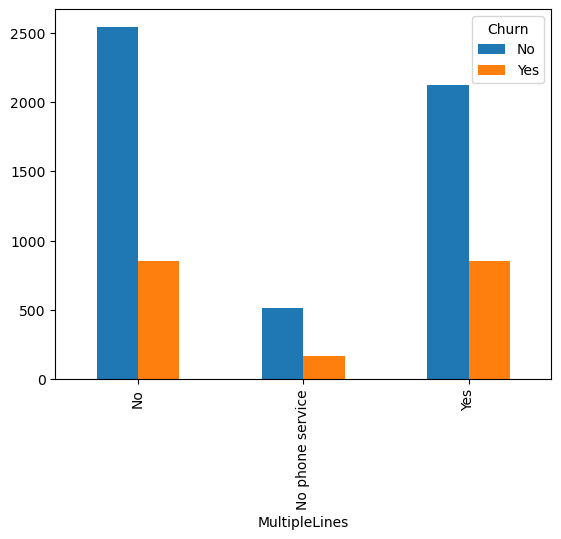

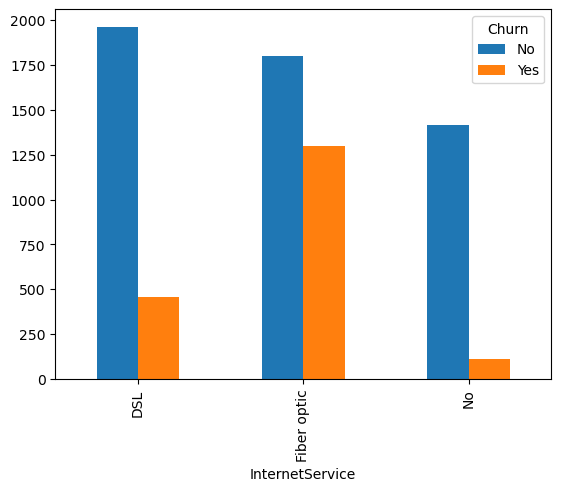

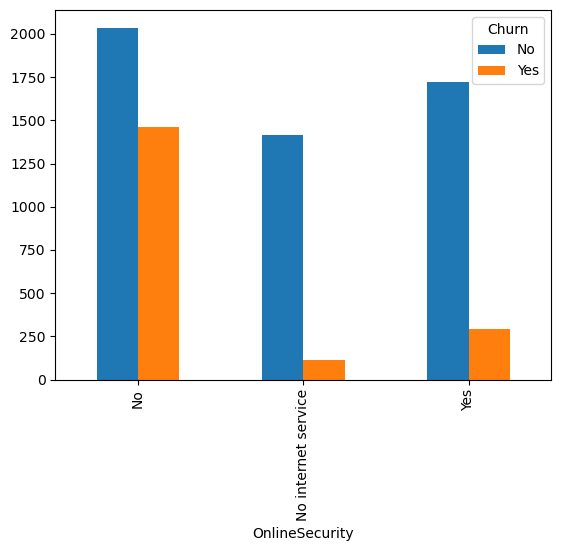

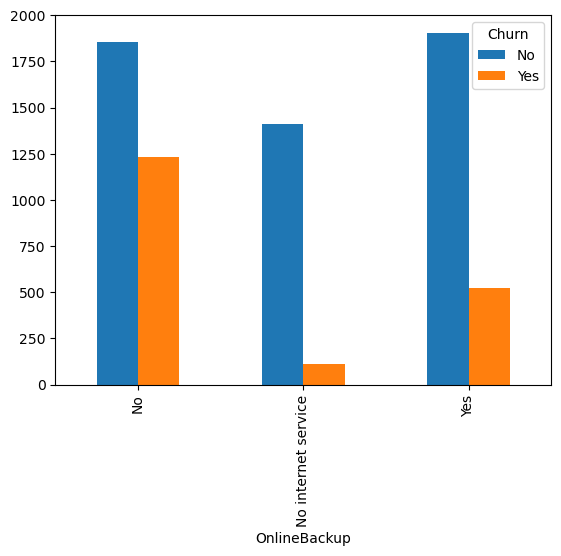

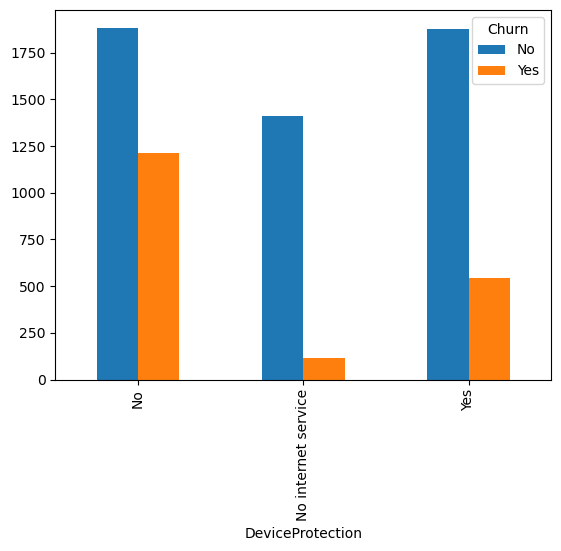

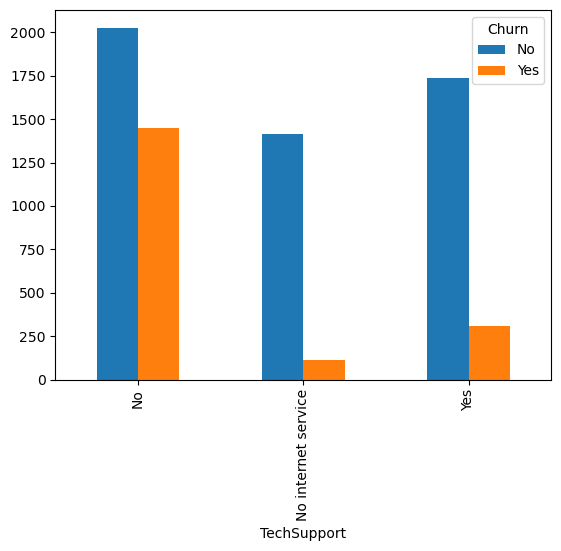

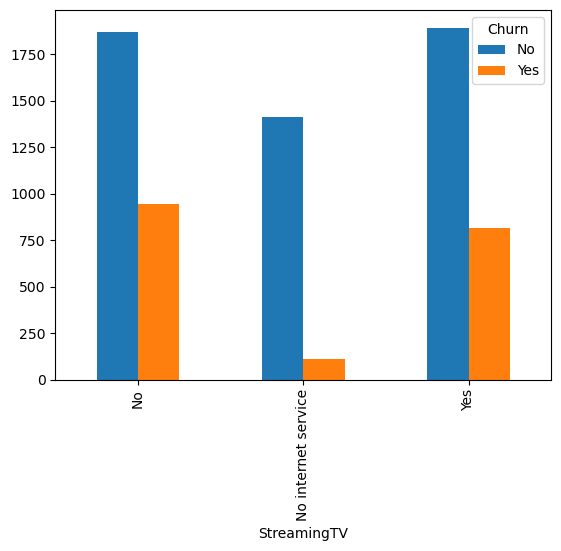

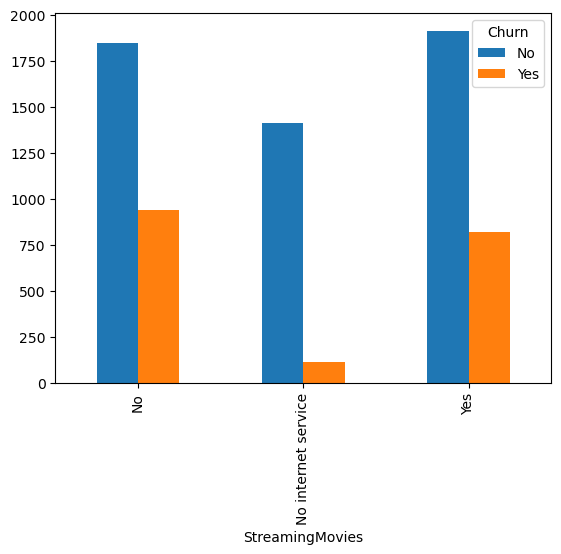

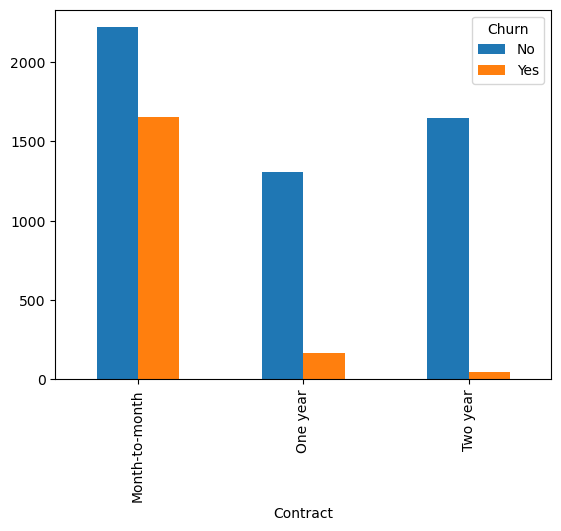

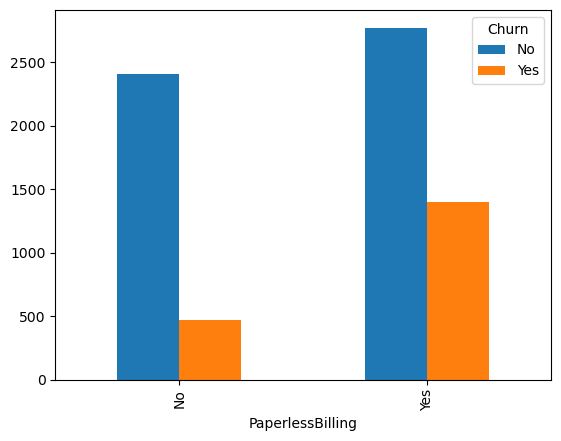

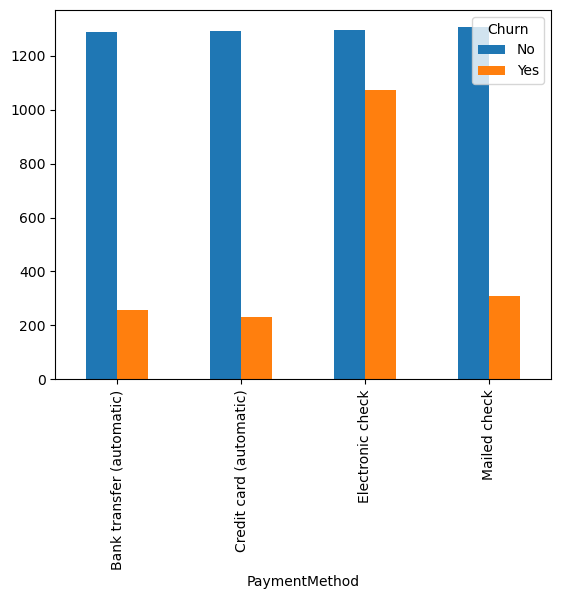

In [19]:
for i in cat_cols:
    if i != 'Churn':
        pd.crosstab(index=data[i],columns=data['Churn']).plot(kind='bar')
plt.show()

<div style="background-color: #ffff99; padding: 10px;">

### **1. Demographic Insights**

**Gender**: The churn rate is almost equal for both males and females, suggesting that gender is not a significant factor influencing churn. The company may want to focus on other more significant variables.

**Senior Citizen**: Senior citizens are less likely to churn, possibly due to age-related reluctance to change services. Offering age-friendly services could strengthen this loyalty.

**Partner and Dependents**: Customers without partners or dependents are more likely to churn. This could indicate that single or independent customers may have different needs or levels of satisfaction. Offering family-oriented benefits may retain these customers better.

### **2. Service Satisfaction**

**Phone Service**: Since customers with phone service are churning more, there might be dissatisfaction with the service quality. The company should investigate customer complaints or run surveys specifically focused on phone service satisfaction.

**Fiber Optics**: The high churn rate among fiber optic users signals dissatisfaction, potentially due to technical issues. Investigating and improving the quality of the fiber optics service could help retain customers.

**Multiple Lines**: The churn rate is the same regardless of whether multiple lines are used, indicating that the presence of multiple lines does not significantly impact churn. The focus should remain on the quality of the main services.

### **3. Value-Added Services**

**Online Security, Online Backup, Device Protection, Tech Support**: For all these services, customers who did not avail of these add-ons are more likely to churn. This suggests that customers may find value in additional protection or support services. Offering incentives to adopt these services may reduce churn.

### **4. Entertainment & Content**

**Streaming TV & Movies**: The slight increase in churn for customers who don’t use streaming TV and Movies suggests that content services could be a differentiating factor. Enhancing streaming options could potentially retain more customers.

### **5. Contract and Payment Preferences**

**Contract**: The highest churn rate is seen in customers with month-to-month contracts, suggesting that long-term contracts might reduce churn by locking in customer loyalty. Offering benefits or discounts for switching to longer-term contracts may be effective.

**Paperless Billing**: Higher churn with paperless billing could indicate frustration with the process. Simplifying the billing system or offering better customer support for paperless billing might help retain customers.

**Payment Method**: The highest churn is associated with customers using electronic checks. Improving the user experience for electronic payments or promoting alternative payment methods may help resolve this issue.

### **Conclusion**:
The analysis suggests that the churn is closely related to service quality (especially fiber optics and phone service), the lack of additional protection/support services, and the inconvenience in billing and payments. Focusing on these areas could significantly improve customer retention.

# **Inferential Statistics**

<div style="background-color: lightblue; padding: 10px;">

### **Columns for Hypothesis Testing**:

**Tenure**: Test if shorter tenure is associated with higher churn.

**Monthly Charges**: Test if churned customers have higher monthly charges.

**Partner Status**: Test if customers without partners are more likely to churn.

**Dependents**: Test if customers without dependents are more likely to churn.

**Contract Type**: Test if month-to-month contracts have higher churn rates compared to long-term contracts.

**Payment Method**: Test if customers using electronic checks are more likely to churn.

**Additional Services (e.g., Online Security, Tech Support, Device Protection)**: Test if customers without these services are more likely to churn.

These columns are essential for testing the relationships between customer attributes and churn behavior.

## **For Numerical Columns**

#### **Monthly Charges and Churn**:

In [20]:
charges_churn = data[data['Churn']=='Yes']['MonthlyCharges']
charges_nonchurn = data[data['Churn']=='No']['MonthlyCharges']

#### Checking Assumptions

In [21]:
# Assumption 1: Data is normal

# Ho: Data is normal
# Ha: Data is not normal

test_statistic,p_value = stats.shapiro(data['MonthlyCharges'])
print(f"test_statistic: {test_statistic}\tp_value: {p_value}")

alpha = 0.05

if p_value < 0.05:
    print("Reject Ho")
else:
    print("Failed to Reject Ho")

test_statistic: 0.9208890199661255	p_value: 0.0
Reject Ho


In [22]:
# Assumption 2: Variances are Equal

# Ho: Variances are Equal
# Ha: Variances are not equal

test_statistic,p_value = stats.levene(charges_churn,charges_nonchurn)
print(f"test_statistic: {test_statistic}\tp_value: {p_value}")

alpha = 0.05

if p_value < 0.05:
    print("Reject Ho")
else:
    print("Failed to Reject Ho")

test_statistic: 361.8444859598828	p_value: 1.0261244899421871e-78
Reject Ho


* #### Since both the Assumptions have failed so we have to proceed with a non-parametric test like Mannwhitneyu test.

In [23]:
# mu1: mean monthly charges of churn customers.
# mu2: mean monthly charges of non-churn customers.

# Ho: There is no significant difference in the monthly charges of churned and non-churned customers (mu1=mu2)
# Ha: There is a significant difference in the monthly charges of churned and non-churned customers (m1 <> mu2)

test_statistic, p_value = stats.mannwhitneyu(charges_churn,charges_nonchurn,alternative='two-sided')
print(f"test_statistic: {test_statistic}\tp_value: {p_value}")

alpha = 0.05

if p_value < 0.05/2:
    print("Reject Ho")
else:
    print("Failed to Reject Ho")

test_statistic: 6003125.5	p_value: 3.311627651988585e-54
Reject Ho


<div style="background-color: lightblue; padding: 10px;">

* **Since the p-value (3.31 x 10⁻²⁰⁸) is significantly less than the significance level of 0.025 (α = 0.05/2 for a two-tailed test), we reject the null hypothesis (H₀).**

<div style="background-color: lightblue; padding: 10px;">

### **Conclusion**:

* **There is a statistically significant difference in the monthly charges between churned and non-churned customers. This indicates that monthly charges are likely influencing customer churn, suggesting that the company should investigate its pricing strategy and value proposition to enhance customer retention.**

#### **Tenure and Churn**:

In [24]:
tenure_churn = data[data['Churn']=='Yes']['tenure']
tenure_nonchurn = data[data['Churn']=='No']['tenure']

#### Checking Assumptions

In [25]:
# Assumption 1: Data is normal

# Ho: Data is normal
# Ha: Data is not normal

test_statistic,p_value = stats.shapiro(data['tenure'])
print(f"test_statistic: {test_statistic}\tp_value: {p_value}")

alpha = 0.05

if p_value < 0.05:
    print("Reject Ho")
else:
    print("Failed to Reject Ho")

test_statistic: 0.9037514925003052	p_value: 0.0
Reject Ho


In [26]:
# Assumption 2: Variances are Equal

# Ho: Variances are Equal
# Ha: Variances are not equal

test_statistic,p_value = stats.levene(tenure_churn,tenure_nonchurn)
print(f"test_statistic: {test_statistic}\tp_value: {p_value}")

alpha = 0.05

if p_value < 0.05:
    print("Reject Ho")
else:
    print("Failed to Reject Ho")

test_statistic: 417.1696228201477	p_value: 3.963539602787529e-90
Reject Ho


#### Since both the Assumptions have failed so we have to proceed with a non-parametric test like Mannwhitneyu test.

In [27]:
# mu1:  There is no significant difference in the tenure of churned and non-churned customers (mu1=mu2)
# mu2: There is a significant difference in the tenure of churned and non-churned customers (mu1<>mu2)

# Ho: mu1 <= mu2
# Ha: mu1 > mu2

test_statistic, p_value = stats.mannwhitneyu(tenure_churn,tenure_nonchurn,alternative='two-sided')
print(f"test_statistic: {test_statistic}\tp_value: {p_value}")

alpha = 0.05

if p_value < 0.05/2:
    print("Reject Ho")
else:
    print("Failed to Reject Ho")

test_statistic: 2515538.0	p_value: 2.419635517951866e-208
Reject Ho


<div style="background-color: lightblue; padding: 10px;">

* **Since the p-value (2.42 x 10⁻²⁰⁸) is significantly less than the significance level of 0.025 (α = 0.05/2 for a two-tailed test), we reject the null hypothesis (H₀).**

<div style="background-color: lightblue; padding: 10px;">

### **Conclusion**:

* **There is a statistically significant difference in tenure between churned and non-churned customers, indicating that the median tenure of churned customers is greater than that of non-churned customers. This finding suggests that longer-tenured customers may be less likely to churn, implying that customer retention efforts should focus on enhancing the experience of newer customers to prevent churn.**

## **For Categorical Columns**

### **Demographic Factors**

#### **Dependents and Churn**

In [28]:
#Ho: Variables are independent
#Ha: Variables are dependent

observed_table = pd.crosstab(data['Dependents'],data['Churn'])

chi_statistic, p_value, dof, exp_freq = stats.chi2_contingency(observed_table)
print(f"chi_statistic: {chi_statistic}\tp_value: {p_value}")

alpha = 0.05

if p_value < 0.05:
    print("Reject Ho")
else:
    print("Failed to reject Ho")

chi_statistic: 189.12924940423474	p_value: 4.9249216612154196e-43
Reject Ho


<div style="background-color: lightblue; padding: 10px;">

* **Since the p-value (4.92 x 10⁻⁴³) is significantly less than the significance level of 0.05, we reject the null hypothesis (H₀).**

<div style="background-color: lightblue; padding: 10px;">

### **Conclusion:**

* **There is a statistically significant association between the presence of dependents and customer churn. This indicates that whether or not customers have dependents influences their likelihood of churning. Given this relationship, the company may want to tailor its retention strategies by considering the specific needs and concerns of customers with dependents to further reduce churn rates.**

#### **Partner and Churn**

In [29]:
#Ho: Variables are independent
#Ha: Variables are dependent

observed_table = pd.crosstab(data['Partner'],data['Churn'])

chi_statistic, p_value, dof, exp_freq = stats.chi2_contingency(observed_table)
print(f"chi_statistic: {chi_statistic}\tp_value: {p_value}")

alpha = 0.05

if p_value < 0.05:
    print("Reject Ho")
else:
    print("Failed to reject Ho")

chi_statistic: 158.7333820309922	p_value: 2.1399113440759935e-36
Reject Ho


<div style="background-color: lightblue; padding: 10px;">

* **Since the p-value (2.14 x 10⁻³⁶) is significantly less than the significance level of 0.05, we reject the null hypothesis (H₀).**

<div style="background-color: lightblue; padding: 10px;">

### **Conclusion**:

* **There is a statistically significant association between having a partner and customer churn. This indicates that whether customers have partners influences their likelihood of churning.The company should consider this relationship when developing retention strategies, potentially focusing on the unique needs and experiences of customers with partners to help reduce churn rates.**

### **Service Factors**

#### **Phone Service and Churn**

In [30]:
#Ho: Variables are independent
#Ha: Variables are dependent

observed_table = pd.crosstab(data['PhoneService'],data['Churn'])

chi_statistic, p_value, dof, exp_freq = stats.chi2_contingency(observed_table)
print(f"chi_statistic: {chi_statistic}\tp_value: {p_value}")

alpha = 0.05

if p_value < 0.05:
    print("Reject Ho")
else:
    print("Failed to reject Ho")

chi_statistic: 0.9150329892546948	p_value: 0.3387825358066928
Failed to reject Ho


<div style="background-color: lightblue; padding: 10px;">

* **Since the p-value (0.339) is greater than the significance level of 0.05, we fail to reject the null hypothesis (H₀).**

<div style="background-color: lightblue; padding: 10px;">

### **Conclusion**:

* **There is no statistically significant association between having phone service and customer churn. This suggests that whether or not customers have phone service does not significantly influence their likelihood of churning.The company may consider that the provision of phone services is not a critical factor in customer retention. Thus, efforts to reduce churn may need to focus on other aspects of customer experience and satisfaction.**

#### **Internet Service and Churn**

In [31]:
#Ho: Variables are independent
#Ha: Variables are dependent

observed_table = pd.crosstab(data['InternetService'],data['Churn'])

chi_statistic, p_value, dof, exp_freq = stats.chi2_contingency(observed_table)
print(f"chi_statistic: {chi_statistic}\tp_value: {p_value}")

alpha = 0.05

if p_value < 0.05:
    print("Reject Ho")
else:
    print("Failed to reject Ho")

chi_statistic: 732.309589667794	p_value: 9.571788222840544e-160
Reject Ho


<div style="background-color: lightblue; padding: 10px;">

* **Since the p-value (9.57 x 10⁻¹⁶⁰) is significantly less than the significance level of 0.05, we reject the null hypothesis (H₀).**

<div style="background-color: lightblue; padding: 10px;">

### **Conclusion**:

* **There is a statistically significant association between the type of internet service and customer churn. This indicates that the type of internet service provided (e.g., Fiber Optic, DSL, No Internet) influences the likelihood of customers churning.The company should analyze the reasons behind the churn related to different types of internet services. Understanding these dynamics can guide targeted retention strategies for customers based on their internet service type, potentially leading to improved customer satisfaction and lower churn rates.**

#### **Multiple Lines and Churn**

In [32]:
#Ho: Variables are independent
#Ha: Variables are dependent

observed_table = pd.crosstab(data['MultipleLines'],data['Churn'])

chi_statistic, p_value, dof, exp_freq = stats.chi2_contingency(observed_table)
print(f"chi_statistic: {chi_statistic}\tp_value: {p_value}")

alpha = 0.05

if p_value < 0.05:
    print("Reject Ho")
else:
    print("Failed to reject Ho")

chi_statistic: 11.33044148319756	p_value: 0.0034643829548773
Reject Ho


<div style="background-color: lightblue; padding: 10px;">

* **Since the p-value (0.0035) is less than the significance level of 0.05, we reject the null hypothesis (H₀).**

<div style="background-color: lightblue; padding: 10px;">

### **Conclusion**:

* **There is a statistically significant association between having multiple lines and customer churn. This indicates that whether customers have multiple lines influences their likelihood of churning.The company should investigate the reasons behind this relationship, as it suggests that customers with or without multiple lines may have different experiences or satisfaction levels. Tailoring retention strategies based on the number of lines customers have could help reduce churn rates.**

### **Value-Added Services**

#### **Online Backup and Churn**

In [33]:
#Ho: Variables are independent
#Ha: Variables are dependent

observed_table = pd.crosstab(data['OnlineBackup'],data['Churn'])

chi_statistic, p_value, dof, exp_freq = stats.chi2_contingency(observed_table)
print(f"chi_statistic: {chi_statistic}\tp_value: {p_value}")

alpha = 0.05

if p_value < 0.05:
    print("Reject Ho")
else:
    print("Failed to reject Ho")

chi_statistic: 601.812790113409	p_value: 2.0797592160864276e-131
Reject Ho


<div style="background-color: lightblue; padding: 10px;">

* **Since the p-value (2.08 x 10⁻¹³¹) is significantly less than the significance level of 0.05, we reject the null hypothesis (H₀).**

<div style="background-color: lightblue; padding: 10px;">

### **Conclusion**:

* **There is a statistically significant association between having online backup and customer churn. This indicates that the availability of online backup services influences the likelihood of customers churning.The company should further investigate how online backup services impact customer satisfaction and retention. Understanding the reasons behind this relationship can help inform strategies to enhance these services, potentially leading to reduced churn rates.**

#### **Online Security and Churn**

In [34]:
#Ho: Variables are independent
#Ha: Variables are dependent

observed_table = pd.crosstab(data['OnlineSecurity'],data['Churn'])

chi_statistic, p_value, dof, exp_freq = stats.chi2_contingency(observed_table)
print(f"chi_statistic: {chi_statistic}\tp_value: {p_value}")

alpha = 0.05

if p_value < 0.05:
    print("Reject Ho")
else:
    print("Failed to reject Ho")

chi_statistic: 849.9989679615965	p_value: 2.661149635176552e-185
Reject Ho


<div style="background-color: lightblue; padding: 10px;">

* **Since the p-value (2.66 x 10⁻¹⁸⁵) is significantly less than the significance level of 0.05, we reject the null hypothesis (H₀).**

<div style="background-color: lightblue; padding: 10px;">

### Conclusion:

* **There is a statistically significant association between having online security and customer churn. This indicates that the availability of online security services influences the likelihood of customers churning.The company should explore the reasons behind this relationship, as it suggests that customers with or without online security have different experiences or satisfaction levels. Enhancing online security services could potentially improve customer retention and reduce churn rates.**

#### **Tech Support and Churn**

In [35]:
#Ho: Variables are independent
#Ha: Variables are dependent

observed_table = pd.crosstab(data['TechSupport'],data['Churn'])

chi_statistic, p_value, dof, exp_freq = stats.chi2_contingency(observed_table)
print(f"chi_statistic: {chi_statistic}\tp_value: {p_value}")

alpha = 0.05

if p_value < 0.05:
    print("Reject Ho")
else:
    print("Failed to reject Ho")

chi_statistic: 828.1970684587394	p_value: 1.4430840279998987e-180
Reject Ho


<div style="background-color: lightblue; padding: 10px;">

* **Since the p-value (1.44 x 10⁻¹⁸⁰) is significantly less than the significance level of 0.05, we reject the null hypothesis (H₀).**

<div style="background-color: lightblue; padding: 10px;">

### **Conclusion**:

* **There is a statistically significant association between the availability of tech support and customer churn. This indicates that the presence of tech support influences the likelihood of customers churning. The company should investigate how the quality and availability of tech support affect customer satisfaction and retention. Enhancing tech support services could be a valuable strategy for improving customer loyalty and reducing churn rates.**

### **Entertainment Factors**

#### **StreamingTv and Churn**

In [36]:
#Ho: Variables are independent
#Ha: Variables are dependent

observed_table = pd.crosstab(data['StreamingTV'],data['Churn'])

chi_statistic, p_value, dof, exp_freq = stats.chi2_contingency(observed_table)
print(f"chi_statistic: {chi_statistic}\tp_value: {p_value}")

alpha = 0.05

if p_value < 0.05:
    print("Reject Ho")
else:
    print("Failed to reject Ho")

chi_statistic: 374.2039433109813	p_value: 5.528994485739183e-82
Reject Ho


<div style="background-color: lightblue; padding: 10px;">

* **Since the p-value (5.53 x 10⁻⁸²) is significantly less than the significance level of 0.05, we reject the null hypothesis (H₀).**

<div style="background-color: lightblue; padding: 10px;">

### **Conclusion**:

* **There is a statistically significant association between the availability of streaming TV services and customer churn. This indicates that whether customers use streaming TV services influences their likelihood of churning.The company should explore how the offering of streaming TV impacts customer satisfaction and retention. Understanding customer preferences in streaming services could lead to enhanced offerings that may reduce churn rates and improve overall customer loyalty.**

### **Contract and Payment Factors**

#### **Contract and Churn**

In [37]:
#Ho: Variables are independent
#Ha: Variables are dependent

observed_table = pd.crosstab(data['Contract'],data['Churn'])

chi_statistic, p_value, dof, exp_freq = stats.chi2_contingency(observed_table)
print(f"chi_statistic: {chi_statistic}\tp_value: {p_value}")

alpha = 0.05

if p_value < 0.05:
    print("Reject Ho")
else:
    print("Failed to reject Ho")

chi_statistic: 1184.5965720837926	p_value: 5.863038300673391e-258
Reject Ho


<div style="background-color: lightblue; padding: 10px;">

* **Since the p-value (5.86 x 10⁻²⁵⁸) is significantly less than the significance level of 0.05, we reject the null hypothesis (H₀).**

<div style="background-color: lightblue; padding: 10px;">

### **Conclusion**:

**There is a statistically significant association between the type of contract (e.g., month-to-month, one year, two years) and customer churn. This indicates that the type of contract influences the likelihood of customers churning.Understanding how different contract types affect customer retention can inform strategic decisions. The company may want to evaluate its contract offerings and explore ways to enhance customer loyalty, especially for those on month-to-month contracts, who may be more likely to churn.**

#### **Paperless Billing and Churn**

In [38]:
#Ho: Variables are independent
#Ha: Variables are dependent

observed_table = pd.crosstab(data['PaperlessBilling'],data['Churn'])

chi_statistic, p_value, dof, exp_freq = stats.chi2_contingency(observed_table)
print(f"chi_statistic: {chi_statistic}\tp_value: {p_value}")

alpha = 0.05

if p_value < 0.05:
    print("Reject Ho")
else:
    print("Failed to reject Ho")

chi_statistic: 258.27764906707307	p_value: 4.073354668665985e-58
Reject Ho


<div style="background-color: lightblue; padding: 10px;">

* **Since the p-value (4.07 x 10⁻⁵⁸) is significantly less than the significance level of 0.05, we reject the null hypothesis (H₀).**

<div style="background-color: lightblue; padding: 10px;">

### **Conclusion**:

* **There is a statistically significant association between the use of paperless billing and customer churn. This indicates that the choice to opt for paperless billing impacts the likelihood of customers churning.The company may need to investigate the reasons behind the churn rates of customers who opt for paperless billing. Understanding these factors could help improve customer retention strategies, such as enhancing the paperless billing experience or providing additional incentives for customers to stay.**

#### **Payment Method and Churn**

In [39]:
#Ho: Variables are independent
#Ha: Variables are dependent

observed_table = pd.crosstab(data['PaymentMethod'],data['Churn'])

chi_statistic, p_value, dof, exp_freq = stats.chi2_contingency(observed_table)
print(f"chi_statistic: {chi_statistic}\tp_value: {p_value}")

alpha = 0.05

if p_value < 0.05:
    print("Reject Ho")
else:
    print("Failed to reject Ho")

chi_statistic: 648.1423274814	p_value: 3.6823546520097993e-140
Reject Ho


<div style="background-color: lightblue; padding: 10px;">

* **Since the p-value (3.68 x 10⁻¹⁴⁰) is significantly less than the significance level of 0.05, we reject the null hypothesis (H₀).**

<div style="background-color: lightblue; padding: 10px;">

### **Conclusion**:

* **There is a statistically significant association between the payment method and customer churn. This indicates that the method customers use to make payments affects their likelihood of churning.The company should analyze the reasons behind the churn rates associated with different payment methods. Understanding these factors could help improve payment processes and customer retention strategies, potentially by addressing issues related to less favorable payment methods or providing incentives for using preferred methods.**

# **Data Preprocessing**

### **Checking for Duplicate rows**

In [40]:
data[data.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
9117-SHLZX,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1934-SJVJK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
8605-ITULD,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
9804-ICWBG,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
3247-MHJKM,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
5996-DAOQL,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2668-TZSPS,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
2636-ALXXZ,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
7096-UCLNH,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No


### **Removing Duplicate rows**

In [41]:
data.drop_duplicates(inplace=True)

In [42]:
data[data.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,


### **Checking for Null Values**

In [43]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<div style="background-color: #ffff99; padding: 10px;">

* **Column TotalCharges has 11 null values.**

### **Treating Null Values**

In [44]:
data[data['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No


In [45]:
# Null Value Imputation
en_val = data[data['Churn']=='No']['TotalCharges'].median()
data['TotalCharges'].fillna(en_val,inplace=True)

In [46]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### **Checking Outliers**

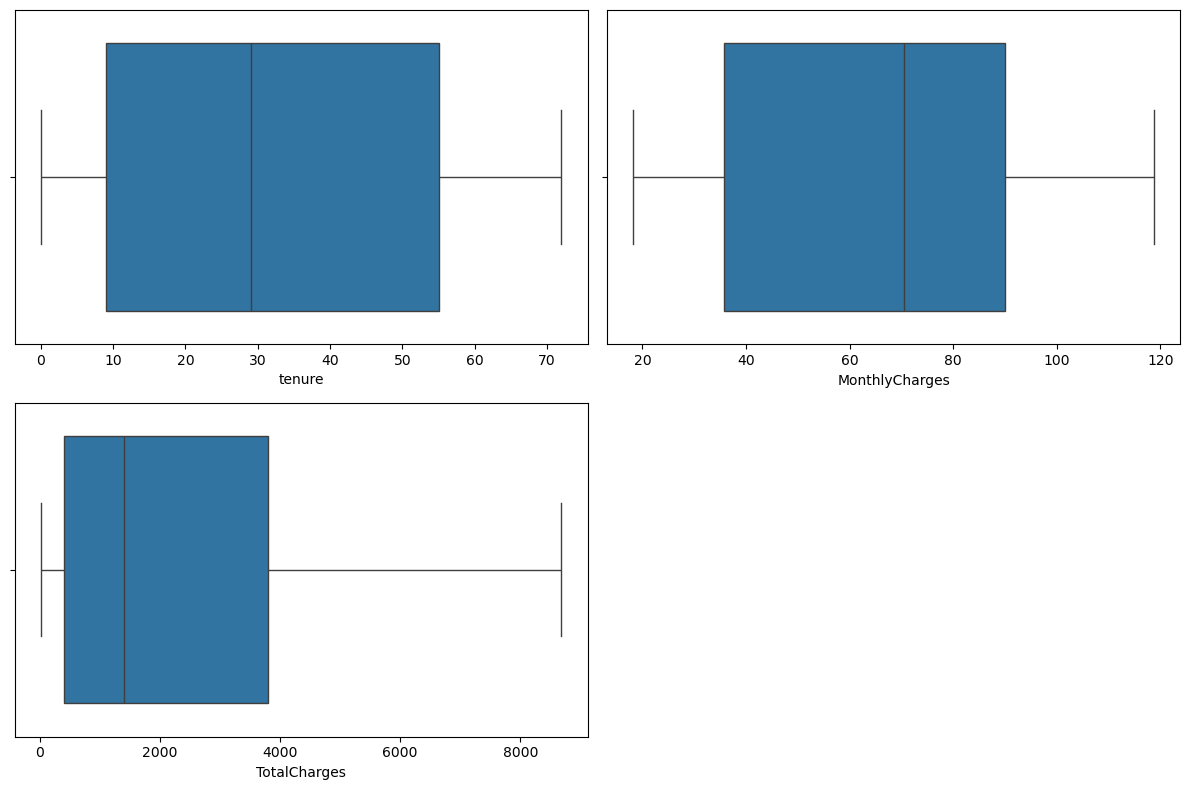

In [47]:
t = 1
plt.figure(figsize=(12,8))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data[i],orient='h')
    t += 1
plt.tight_layout()
plt.show()

<div style="background-color: #ffff99; padding: 10px;">

* There are no outlier values in the numerical columns.

## **Encoding**

In [48]:
cat_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [49]:
for i in cat_cols:
    print(f"Number of Categories in {i}: {len(data[i].unique())}")
    print(data[i].value_counts())
    print()

Number of Categories in gender: 2
gender
Male      3541
Female    3480
Name: count, dtype: int64

Number of Categories in SeniorCitizen: 2
SeniorCitizen
0    5880
1    1141
Name: count, dtype: int64

Number of Categories in Partner: 2
Partner
No     3619
Yes    3402
Name: count, dtype: int64

Number of Categories in Dependents: 2
Dependents
No     4911
Yes    2110
Name: count, dtype: int64

Number of Categories in PhoneService: 2
PhoneService
Yes    6339
No      682
Name: count, dtype: int64

Number of Categories in MultipleLines: 3
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: count, dtype: int64

Number of Categories in InternetService: 3
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64

Number of Categories in OnlineSecurity: 3
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: count, dtype: int64

Number of Categories in OnlineB

In [50]:
data['Churn'] = data['Churn'].map({'No':0,'Yes':1})
data['gender'] = data['gender'].map({'Male':1,'Female':0})
data['Partner'] = data['Partner'].map({'No':0,'Yes':1})
data['Dependents'] = data['Dependents'].map({'No':0,'Yes':1})
data['PhoneService'] = data['PhoneService'].map({'No':0,'Yes':1})
data['MultipleLines'] = data['MultipleLines'].map({'No':0,'No phone service':1,'Yes':2})
data['InternetService'] = data['InternetService'].map({'No':0,'DSL':1,'Fiber optic':2})
data['OnlineSecurity'] = data['OnlineSecurity'].map({'No':0,'No internet service':1,'Yes':2})
data['OnlineBackup'] = data['OnlineBackup'].map({'No':0,'No internet service':1,'Yes':2})
data['DeviceProtection'] = data['DeviceProtection'].map({'No':0,'No internet service':1,'Yes':2})
data['TechSupport'] = data['TechSupport'].map({'No':0,'No internet service':1,'Yes':2})
data['StreamingTV'] = data['StreamingTV'].map({'No':0,'No internet service':1,'Yes':2})
data['StreamingMovies'] = data['StreamingMovies'].map({'No':0,'No internet service':1,'Yes':2})
data['Contract'] = data['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'No':0,'Yes':1})

In [51]:
dict_1 = data['PaymentMethod'].value_counts(normalize=True).to_dict()
data['PaymentMethod'] = data['PaymentMethod'].map(dict_1)

In [52]:
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,1,0,2,0,0,0,0,0,1,0.335992,29.85,29.85,0
5575-GNVDE,1,0,0,0,34,1,0,1,2,0,2,0,0,0,1,0,0.227318,56.95,1889.50,0
3668-QPYBK,1,0,0,0,2,1,0,1,2,2,0,0,0,0,0,1,0.227318,53.85,108.15,1
7795-CFOCW,1,0,0,0,45,0,1,1,2,0,2,2,0,0,1,0,0.219912,42.30,1840.75,0
9237-HQITU,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0.335992,70.70,151.65,1


## **Train Test Split**

In [53]:
x = data.drop(columns='Churn')
y = data['Churn']

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,random_state=2,stratify=y)

In [55]:
# Training Dataset Dimensions
x_train.shape,y_train.shape

((5616, 19), (5616,))

In [56]:
# Test Dataset Dimensions
x_test.shape,y_test.shape

((1405, 19), (1405,))

### **Class Imbalance**

In [57]:
y_train.value_counts(normalize=True)

Churn
0    0.735577
1    0.264423
Name: proportion, dtype: float64

<div style="background-color: #ffff99; padding: 10px;">

The given data shows a class imbalance between two categories:

* **Class 0 (Non-Churn): 73.56% of the data**
  
* **Class 1 (Churn): 26.44% of the data**

This imbalance means that there are significantly more instances of non-churn than churn, which could lead to biased model predictions, favoring the majority class (non-churn) and potentially underperforming on the minority class (churn). Addressing this imbalance is important for improving the model's ability to accurately predict churn.

We will treat the class imbalance in the given data using **SMOTE (Synthetic Minority Over-sampling Technique)**

### **SMOTE**

In [58]:
smote = SMOTE(random_state=2)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train,y_train)

# **Predictive Modelling**

## **Logistic Regression**

In [59]:
lr = LogisticRegression()
lr.fit(x_train_resampled,y_train_resampled)
ypred_s_lr = lr.predict_proba(x_test)[:,1]
ypred_h_lr = lr.predict(x_test)

* **Confusion Matrix**

In [60]:
print(confusion_matrix(y_test,ypred_h_lr))

[[762 271]
 [104 268]]


* **Classification Report**

In [61]:
print(classification_report(y_test,ypred_h_lr))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1033
           1       0.50      0.72      0.59       372

    accuracy                           0.73      1405
   macro avg       0.69      0.73      0.70      1405
weighted avg       0.78      0.73      0.75      1405



* **ROC Curve**

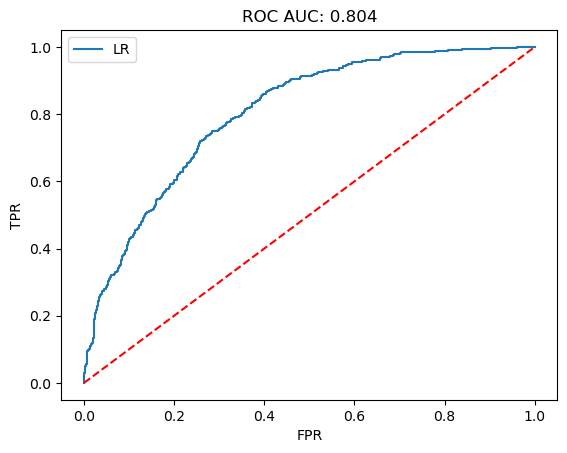

In [62]:
fpr_lr,tpr_lr,thres_lr = roc_curve(y_test,ypred_s_lr)
plt.plot(fpr_lr,tpr_lr,label='LR')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f"ROC AUC: {round(roc_auc_score(y_test,ypred_s_lr),3)}")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

## **Naive Bayes**

### **Bernoulli Naive Bayes**

In [63]:
bnb = BernoulliNB()
bnb.fit(x_train_resampled,y_train_resampled)
ypred_s_bnb = bnb.predict_proba(x_test)[:,1]
ypred_h_bnb = bnb.predict(x_test)

* **Confusion Matrix**

In [64]:
print(confusion_matrix(y_test,ypred_h_bnb))

[[699 334]
 [ 99 273]]


* **Classification Report**

In [65]:
print(classification_report(y_test,ypred_h_bnb))

              precision    recall  f1-score   support

           0       0.88      0.68      0.76      1033
           1       0.45      0.73      0.56       372

    accuracy                           0.69      1405
   macro avg       0.66      0.71      0.66      1405
weighted avg       0.76      0.69      0.71      1405



* **ROC Curve**

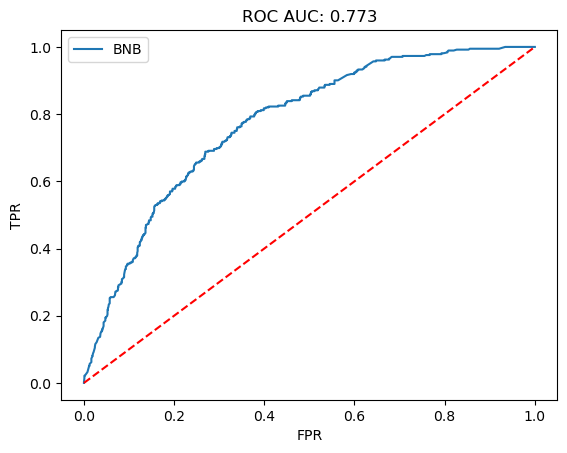

In [66]:
fpr_bnb,tpr_bnb,thres_bnb = roc_curve(y_test,ypred_s_bnb)
plt.plot(fpr_bnb,tpr_bnb,label='BNB')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f"ROC AUC: {round(roc_auc_score(y_test,ypred_s_bnb),3)}")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

### **Gaussian Naive Bayes**

In [67]:
gnb = GaussianNB()
gnb.fit(x_train_resampled,y_train_resampled)
ypred_s_gnb = gnb.predict_proba(x_test)[:,1]
ypred_h_gnb = gnb.predict(x_test)

* **Confusion Matrix**

In [68]:
print(confusion_matrix(y_test,ypred_h_gnb))

[[762 271]
 [112 260]]


* **Classification Report**

In [69]:
print(classification_report(y_test,ypred_h_gnb))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1033
           1       0.49      0.70      0.58       372

    accuracy                           0.73      1405
   macro avg       0.68      0.72      0.69      1405
weighted avg       0.77      0.73      0.74      1405



* **ROC Curve**

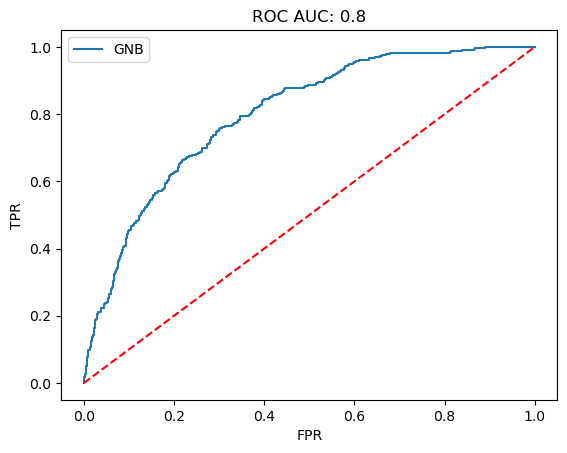

In [70]:
fpr_gnb,tpr_gnb,thres_gnb = roc_curve(y_test,ypred_s_gnb)
plt.plot(fpr_gnb,tpr_gnb,label='GNB')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f"ROC AUC: {round(roc_auc_score(y_test,ypred_s_gnb),3)}")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

# **Decision Tree**

In [71]:
dt = DecisionTreeClassifier()
dt.fit(x_train_resampled,y_train_resampled)
ypred_s_dt = dt.predict_proba(x_test)[:,1]
ypred_h_dt = dt.predict(x_test)

* **Confusion Matrix**

In [72]:
print(confusion_matrix(y_test,ypred_h_dt))

[[808 225]
 [183 189]]


* **Classification Report**

In [73]:
print(classification_report(y_test,ypred_h_dt))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1033
           1       0.46      0.51      0.48       372

    accuracy                           0.71      1405
   macro avg       0.64      0.65      0.64      1405
weighted avg       0.72      0.71      0.71      1405



* **ROC Curve**

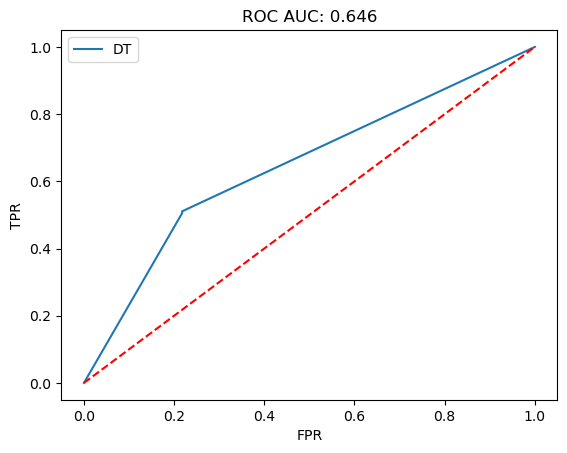

In [74]:
fpr_dt,tpr_dt,thres_dt = roc_curve(y_test,ypred_s_dt)
plt.plot(fpr_dt,tpr_dt,label='DT')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f"ROC AUC: {round(roc_auc_score(y_test,ypred_s_dt),3)}")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

### **Hyperparameter Tuning**

In [75]:
grid = {'criterion':['entropy', 'gini'],'max_depth':[2,3,4,5,6,7,8,9,10]}

In [76]:
gscv = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=grid,scoring='f1',cv=5)
gscv.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='f1')

In [77]:
# Best Score
gscv.best_score_

0.8102343615052577

In [78]:
# Best Parameters
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 10}

#### **Tuned Model**

In [79]:
dt_tuned = DecisionTreeClassifier(**gscv.best_params_)
dt_tuned.fit(x_train_resampled,y_train_resampled)
ypred_s_dt_tuned = dt_tuned.predict_proba(x_test)[:,1]
ypred_h_dt_tuned = dt_tuned.predict(x_test)

* **Confusion Matrix**

In [80]:
print(confusion_matrix(y_test,ypred_h_dt_tuned))

[[836 197]
 [154 218]]


* **Classification Report**

In [81]:
print(classification_report(y_test,ypred_h_dt_tuned))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1033
           1       0.53      0.59      0.55       372

    accuracy                           0.75      1405
   macro avg       0.68      0.70      0.69      1405
weighted avg       0.76      0.75      0.75      1405



* **ROC Curve**

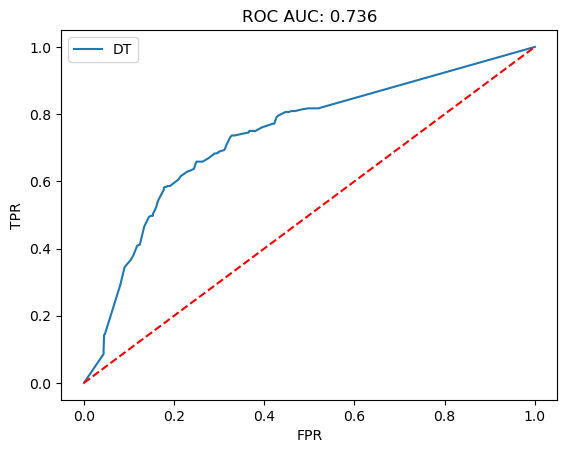

In [82]:
fpr_dt_tuned,tpr_dt_tuned,thres_dt_tuned = roc_curve(y_test,ypred_s_dt_tuned)
plt.plot(fpr_dt_tuned,tpr_dt_tuned,label='DT')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f"ROC AUC: {round(roc_auc_score(y_test,ypred_s_dt_tuned),3)}")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

# **Bagging**

## **Bagging Classifier**

In [83]:
bagg = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',max_depth=4))
bagg.fit(x_train_resampled,y_train_resampled)
ypred_s_bagg = bagg.predict_proba(x_test)[:,1]
ypred_h_bagg = bagg.predict(x_test)

* **Confusion Matrix**

In [84]:
print(confusion_matrix(y_test,ypred_h_bagg))

[[767 266]
 [ 88 284]]


* **Classification Report**

In [85]:
print(classification_report(y_test,ypred_h_bagg))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1033
           1       0.52      0.76      0.62       372

    accuracy                           0.75      1405
   macro avg       0.71      0.75      0.71      1405
weighted avg       0.80      0.75      0.76      1405



* **ROC Curve**

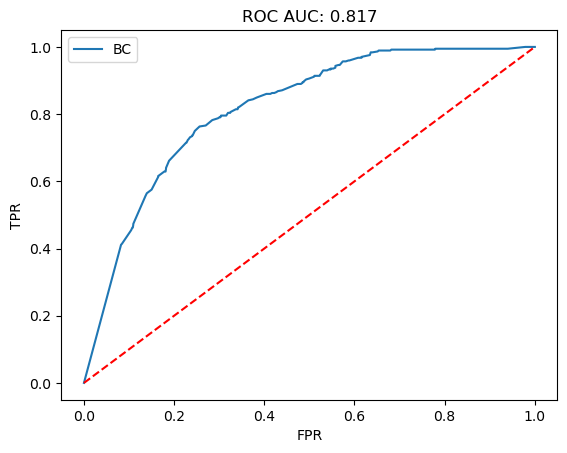

In [86]:
fpr_bagg,tpr_bagg,thres_bagg = roc_curve(y_test,ypred_s_bagg)
plt.plot(fpr_bagg,tpr_bagg,label='BC')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f"ROC AUC: {round(roc_auc_score(y_test,ypred_s_bagg),3)}")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

# **Random Forest**

In [87]:
rf = RandomForestClassifier()
rf.fit(x_train_resampled,y_train_resampled)
ypred_s_rf = rf.predict_proba(x_test)[:,1]
ypred_h_rf = rf.predict(x_test)

* **Confusion Matrix**

In [88]:
print(confusion_matrix(y_test,ypred_h_rf))

[[879 154]
 [167 205]]


* **Classification Report**

In [89]:
print(classification_report(y_test,ypred_h_rf))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1033
           1       0.57      0.55      0.56       372

    accuracy                           0.77      1405
   macro avg       0.71      0.70      0.70      1405
weighted avg       0.77      0.77      0.77      1405



* **ROC Curve**

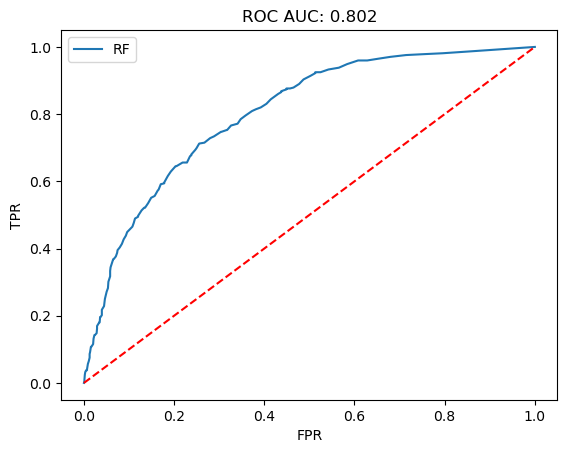

In [90]:
fpr_rf,tpr_rf,thres_rf = roc_curve(y_test,ypred_s_rf)
plt.plot(fpr_rf,tpr_rf,label='RF')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f"ROC AUC: {round(roc_auc_score(y_test,ypred_s_rf),3)}")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

### **Hyperparameter Tuning**

In [91]:
grid = {'criterion': ['entropy','gini'],
        'n_estimators':[40,50,60,70,80,90,100],
        'max_depth':[3,4,5,7,9,10,11]}

In [92]:
gscv = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,scoring='f1',cv=5)
gscv.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 7, 9, 10, 11],
                         'n_estimators': [40, 50, 60, 70, 80, 90, 100]},
             scoring='f1')

In [93]:
# Best Score
gscv.best_score_

0.8365843259266145

In [94]:
# Best Parameters
gscv.best_params_

{'criterion': 'gini', 'max_depth': 11, 'n_estimators': 50}

#### **Tuned Model**

In [95]:
rf_tuned = RandomForestClassifier(**gscv.best_params_)
rf_tuned.fit(x_train_resampled,y_train_resampled)
ypred_s_rf_tuned = rf_tuned.predict_proba(x_test)[:,1]
ypred_h_rf_tuned = rf_tuned.predict(x_test)

* **Confusion Matrix**

In [96]:
print(confusion_matrix(y_test,ypred_h_rf_tuned))

[[851 182]
 [139 233]]


* **Classification Report**

In [97]:
print(classification_report(y_test,ypred_h_rf_tuned))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.56      0.63      0.59       372

    accuracy                           0.77      1405
   macro avg       0.71      0.73      0.72      1405
weighted avg       0.78      0.77      0.78      1405



* **ROC Curve**

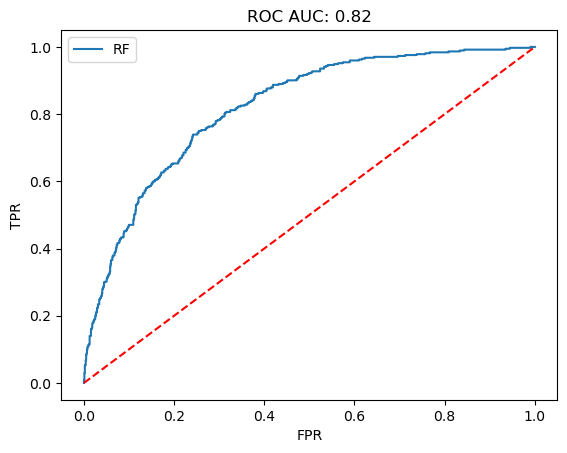

In [98]:
fpr_rf_tuned,tpr_rf_tuned,thres_rf_tuned = roc_curve(y_test,ypred_s_rf_tuned)
plt.plot(fpr_rf_tuned,tpr_rf_tuned,label='RF')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f"ROC AUC: {round(roc_auc_score(y_test,ypred_s_rf_tuned),3)}")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

# ADA Boost

In [99]:
ada = AdaBoostClassifier()
ada.fit(x_train_resampled,y_train_resampled)
ypred_s_ada = ada.predict_proba(x_test)[:,1]
ypred_h_ada = ada.predict(x_test)

* **Confusion Matrix**

In [100]:
print(confusion_matrix(y_test,ypred_h_ada))

[[790 243]
 [113 259]]


* **Classification Report**

In [101]:
print(classification_report(y_test,ypred_h_ada))

              precision    recall  f1-score   support

           0       0.87      0.76      0.82      1033
           1       0.52      0.70      0.59       372

    accuracy                           0.75      1405
   macro avg       0.70      0.73      0.70      1405
weighted avg       0.78      0.75      0.76      1405



* **ROC Curve**

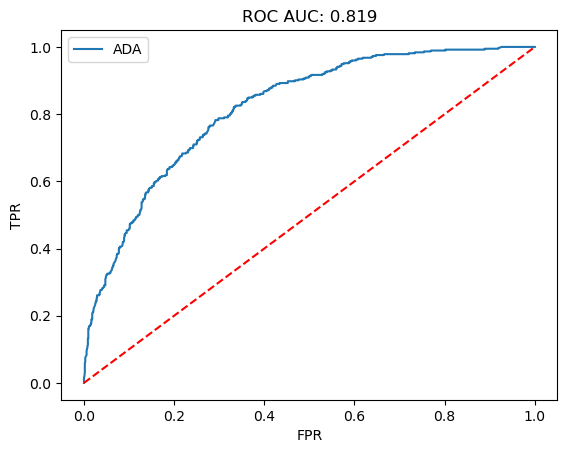

In [102]:
fpr_ada,tpr_ada,thres_ada = roc_curve(y_test,ypred_s_ada)
plt.plot(fpr_ada,tpr_ada,label='ADA')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f"ROC AUC: {round(roc_auc_score(y_test,ypred_s_ada),3)}")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

### **Hyperparameter Tuning**

In [103]:
grid = {'learning_rate':[0.01,0.1,0.02,0.2,0.3,0.5,0.04],
        'n_estimators':[40,50,60,70,80,90,100]}

In [104]:
gscv = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid,scoring='f1',cv=5)
gscv.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.02, 0.2, 0.3, 0.5,
                                           0.04],
                         'n_estimators': [40, 50, 60, 70, 80, 90, 100]},
             scoring='f1')

In [105]:
# Best Score
gscv.best_score_

0.8157979683070995

In [106]:
# Best Parameters
gscv.best_params_

{'learning_rate': 0.5, 'n_estimators': 100}

#### **Tuned Model**

In [107]:
ada_tuned = AdaBoostClassifier(**gscv.best_params_)
ada_tuned.fit(x_train_resampled,y_train_resampled)
ypred_s_ada_tuned = ada_tuned.predict_proba(x_test)[:,1]
ypred_h_ada_tuned = ada_tuned.predict(x_test)

* **Confusion Matrix**

In [108]:
print(confusion_matrix(y_test,ypred_h_ada_tuned))

[[788 245]
 [104 268]]


* **Classification Report**

In [109]:
print(classification_report(y_test,ypred_h_ada_tuned))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1033
           1       0.52      0.72      0.61       372

    accuracy                           0.75      1405
   macro avg       0.70      0.74      0.71      1405
weighted avg       0.79      0.75      0.76      1405



* **ROC Curve**

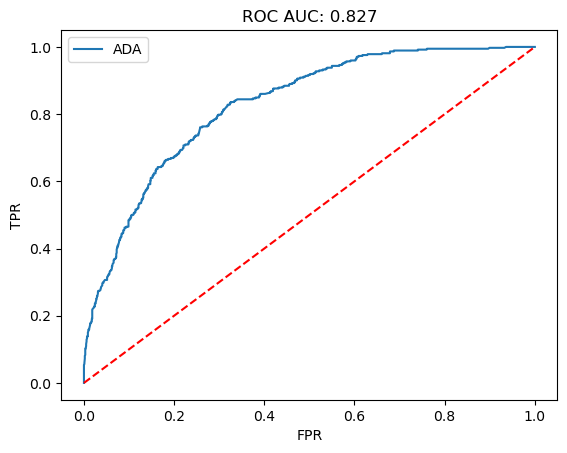

In [110]:
fpr_ada_tuned,tpr_ada_tuned,thres_ada_tuned = roc_curve(y_test,ypred_s_ada_tuned)
plt.plot(fpr_ada_tuned,tpr_ada_tuned,label='ADA')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f"ROC AUC: {round(roc_auc_score(y_test,ypred_s_ada_tuned),3)}")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

# Gradient Boosting

In [111]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train_resampled,y_train_resampled)
ypred_s_gbc = gbc.predict_proba(x_test)[:,1]
ypred_h_gbc = gbc.predict(x_test)

* **Confusion Matrix**

In [112]:
print(confusion_matrix(y_test,ypred_h_gbc))

[[850 183]
 [134 238]]


* **Classification Report**

In [113]:
print(classification_report(y_test,ypred_h_gbc))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.57      0.64      0.60       372

    accuracy                           0.77      1405
   macro avg       0.71      0.73      0.72      1405
weighted avg       0.78      0.77      0.78      1405



* **ROC Curve**

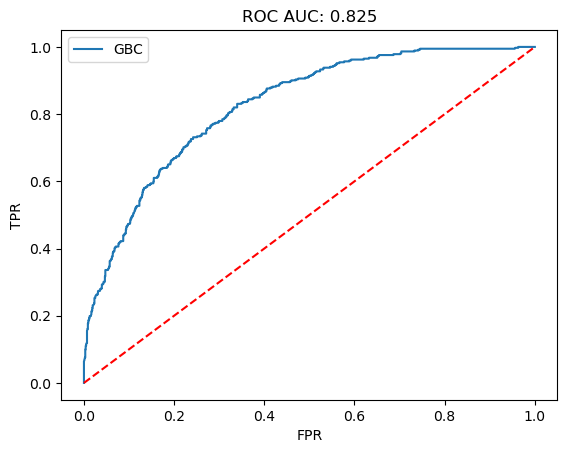

In [114]:
fpr_gbc,tpr_gbc,thres_gbc = roc_curve(y_test,ypred_s_gbc)
plt.plot(fpr_gbc,tpr_gbc,label='GBC')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f"ROC AUC: {round(roc_auc_score(y_test,ypred_s_gbc),3)}")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

### **Hyperparameter Tuning**

In [115]:
grid = {'learning_rate':[0.01,0.1,0.02,0.2,0.3,0.5,0.04],
        'n_estimators':[40,50,60,70,80,90,100],
        'max_depth':[2,3,4,5,6,7]}

In [116]:
gscv = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=grid,scoring='f1',cv=5)
gscv.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.02, 0.2, 0.3, 0.5,
                                           0.04],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [40, 50, 60, 70, 80, 90, 100]},
             scoring='f1')

In [117]:
# Best Score
gscv.best_score_

0.8282281490677086

In [118]:
# Best Parameters
gscv.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 40}

#### **Tuned Model**

In [119]:
gbc_tuned = GradientBoostingClassifier(**gscv.best_params_)
gbc_tuned.fit(x_train_resampled,y_train_resampled)
ypred_s_gbc_tuned = gbc_tuned.predict_proba(x_test)[:,1]
ypred_h_gbc_tuned = gbc_tuned.predict(x_test)

* **Confusion Matrix**

In [120]:
print(confusion_matrix(y_test,ypred_h_gbc_tuned))

[[863 170]
 [146 226]]


* **Classification Report**

In [121]:
print(classification_report(y_test,ypred_h_gbc_tuned))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1033
           1       0.57      0.61      0.59       372

    accuracy                           0.78      1405
   macro avg       0.71      0.72      0.72      1405
weighted avg       0.78      0.78      0.78      1405



* **ROC Curve**

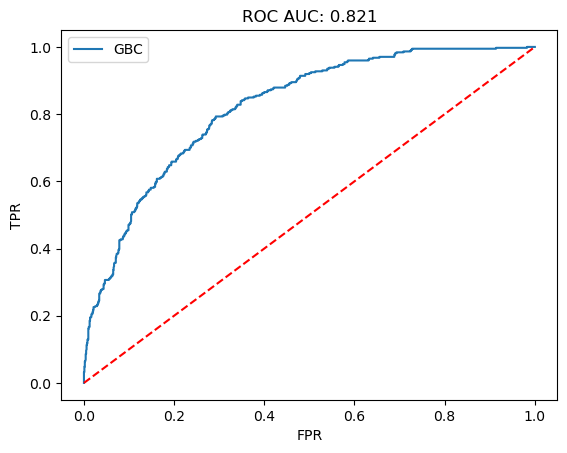

In [122]:
fpr_gbc_tuned,tpr_gbc_tuned,thres_gbc_tuned = roc_curve(y_test,ypred_s_gbc_tuned)
plt.plot(fpr_gbc_tuned,tpr_gbc_tuned,label='GBC')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f"ROC AUC: {round(roc_auc_score(y_test,ypred_s_gbc_tuned),3)}")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

# XGBOOST

In [123]:
xgb = XGBClassifier()
xgb.fit(x_train_resampled,y_train_resampled)
ypred_s_xgb = xgb.predict_proba(x_test)[:,1]
ypred_h_xgb = xgb.predict(x_test)

* **Confusion Matrix**

In [124]:
print(confusion_matrix(y_test,ypred_h_xgb))

[[881 152]
 [171 201]]


* **Classification Report**

In [125]:
print(classification_report(y_test,ypred_h_xgb))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1033
           1       0.57      0.54      0.55       372

    accuracy                           0.77      1405
   macro avg       0.70      0.70      0.70      1405
weighted avg       0.77      0.77      0.77      1405



* **ROC Curve**

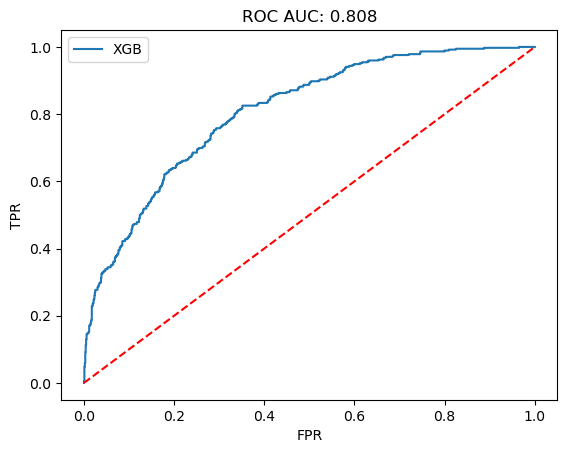

In [126]:
fpr_xgb,tpr_xgb,thres_xgb = roc_curve(y_test,ypred_s_xgb)
plt.plot(fpr_xgb,tpr_xgb,label='XGB')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f"ROC AUC: {round(roc_auc_score(y_test,ypred_s_xgb),3)}")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

### **Hyperparameter Tuning**

In [127]:
grid = {'n_estimators':[70, 100, 120, 150],
        'learning_rate':[0.1, 0.01, 0.001, 0.15, 0.015],
        'gamma':[2, 3, 4, 5, 6],
        'max_depth':[2, 3, 4, 5, 6]}

In [128]:
gscv = GridSearchCV(estimator=XGBClassifier(),param_grid=grid,scoring='f1',cv=5)
gscv.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [2, 3, 4, 5, 6],
                         'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [70, 100, 120, 150]},
             scoring='f1')

In [129]:
# Best Score
gscv.best_score_

0.8236293034913741

In [130]:
# Best Parameters
gscv.best_params_

{'gamma': 3, 'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 70}

#### **Tuned Model**

In [131]:
xgb_tuned = XGBClassifier(**gscv.best_params_)
xgb_tuned.fit(x_train_resampled,y_train_resampled)
ypred_s_xgb_tuned = xgb_tuned.predict_proba(x_test)[:,1]
ypred_h_xgb_tuned = xgb_tuned.predict(x_test)

* **Confusion Matrix**

In [132]:
print(confusion_matrix(y_test,ypred_h_xgb_tuned))

[[856 177]
 [131 241]]


* **Classification Report**

In [133]:
print(classification_report(y_test,ypred_h_xgb_tuned))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1033
           1       0.58      0.65      0.61       372

    accuracy                           0.78      1405
   macro avg       0.72      0.74      0.73      1405
weighted avg       0.79      0.78      0.78      1405



* **ROC Curve**

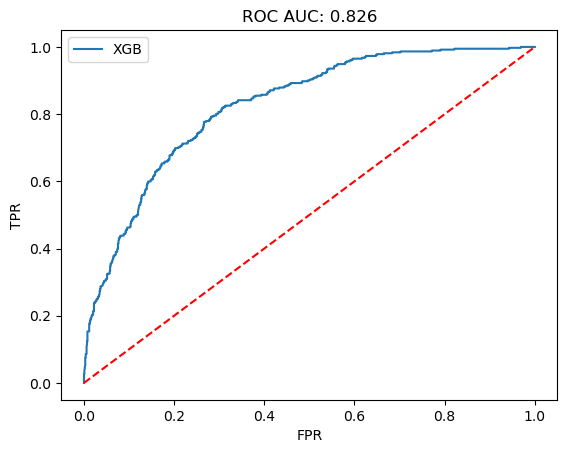

In [134]:
fpr_xgb_tuned,tpr_xgb_tuned,thres_xgb_tuned = roc_curve(y_test,ypred_s_xgb_tuned)
plt.plot(fpr_xgb_tuned,tpr_xgb_tuned,label='XGB')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f"ROC AUC: {round(roc_auc_score(y_test,ypred_s_xgb_tuned),3)}")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

# **Voting**

In [135]:
base_estimators = [('DT', DecisionTreeClassifier(criterion='entropy',max_depth=4)),
                   ('RF', RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=4)),
                   ('GBM', GradientBoostingClassifier(learning_rate=0.1,max_depth=7,n_estimators=80)),
                   ('XGB', XGBClassifier(gamma=3,learning_rate=0.1,max_depth=6,n_estimators=70))]

In [136]:
vot = VotingClassifier(estimators=base_estimators,voting='soft')
vot.fit(x_train_resampled,y_train_resampled)
ypred_s_vot = vot.predict_proba(x_test)[:,1]
ypred_h_vot = vot.predict(x_test)

* **Confusion Matrix**

In [137]:
print(confusion_matrix(y_test,ypred_h_vot))

[[839 194]
 [122 250]]


* **Classification Report**

In [138]:
print(classification_report(y_test,ypred_h_vot))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1033
           1       0.56      0.67      0.61       372

    accuracy                           0.78      1405
   macro avg       0.72      0.74      0.73      1405
weighted avg       0.79      0.78      0.78      1405



* **ROC Curve**

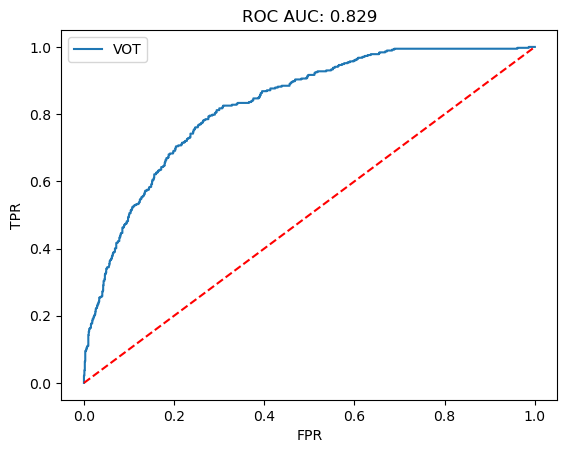

In [139]:
fpr_vot,tpr_vot,thres_vot = roc_curve(y_test,ypred_s_vot)
plt.plot(fpr_vot,tpr_vot,label='VOT')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f"ROC AUC: {round(roc_auc_score(y_test,ypred_s_vot),3)}")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

# **Stacking**

In [140]:
stack = StackingClassifier(estimators=base_estimators,final_estimator=LogisticRegression())
stack.fit(x_train_resampled,y_train_resampled)
ypred_s_stack = stack.predict_proba(x_test)[:,1]
ypred_h_stack = stack.predict(x_test)

* **Confusion Matrix**

In [141]:
print(confusion_matrix(y_test,ypred_h_stack))

[[856 177]
 [145 227]]


* **Classification Report**

In [142]:
print(classification_report(y_test,ypred_h_stack))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1033
           1       0.56      0.61      0.59       372

    accuracy                           0.77      1405
   macro avg       0.71      0.72      0.71      1405
weighted avg       0.78      0.77      0.77      1405



* **ROC Curve**

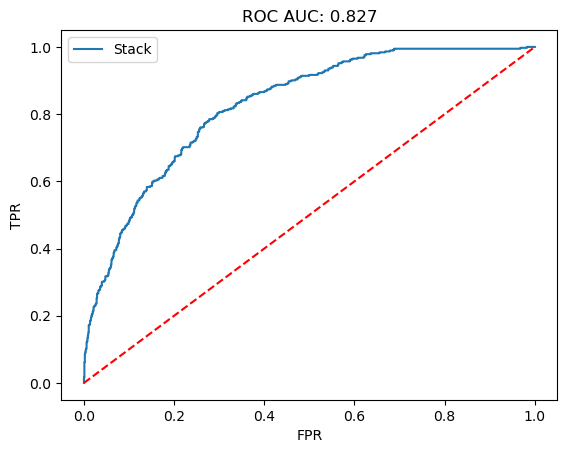

In [143]:
fpr_stack,tpr_stack,thres_stack = roc_curve(y_test,ypred_s_stack)
plt.plot(fpr_stack,tpr_stack,label='Stack')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f"ROC AUC: {round(roc_auc_score(y_test,ypred_s_stack),3)}")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

### **Final Model Conclusion**

<div style="background-color: #ffff99; padding: 10px;">

**Bagging Classifier** has the highest recall **(0.77)**, meaning it identifies **77%** of the actual churn customers. This makes it the best model for correctly predicting churn customers since it minimizes the number of missed churn cases (false negatives).
So, **Bagging Classifier** will be our final model for predicting churn customers.

## **Final Model Validation**

**Set the final model as Bagging Classifier with the best parameters**

In [144]:
grid = {'n_estimators':[10,20,30,40,50,60,70,80,90,100]}

In [145]:
gscv = GridSearchCV(estimator=BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',max_depth=4),oob_score=True),param_grid=grid,scoring='f1',cv=5)
gscv.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                                          max_depth=4),
                                         oob_score=True),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             scoring='f1')

In [146]:
# Best Score
gscv.best_score_

0.7904774437228964

In [147]:
# Best Parameters
gscv.best_params_

{'n_estimators': 100}

### **Fitting Final Model**

In [148]:
fin_model = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',max_depth=4),oob_score=True,**gscv.best_params_)
fin_model.fit(x_train_resampled,y_train_resampled)
ypred_s_fin_model = fin_model.predict_proba(x_test)[:,1]
ypred_h_fin_model = fin_model.predict(x_test)

* **Confusion Matrix**

In [149]:
print(confusion_matrix(y_test,ypred_h_fin_model))

[[756 277]
 [ 87 285]]


* **Classification Report**

In [150]:
print(classification_report(y_test,ypred_h_fin_model))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1033
           1       0.51      0.77      0.61       372

    accuracy                           0.74      1405
   macro avg       0.70      0.75      0.71      1405
weighted avg       0.79      0.74      0.75      1405



<div style="background-color: #ffff99; padding: 10px;">

### **Model Evaluation Summary**

**Accuracy**: 0.74
This means the model correctly predicted 74% of all cases.

#### **Class 0 (Non-churn) Performance**:

**Precision**: 0.90
* Out of all the predicted non-churn customers (class 0), 90% were correctly predicted.

**Recall**: 0.74
* The model correctly identified 74% of the actual non-churn customers.

**F1-score**: 0.81
* A balance between precision and recall, indicating good performance for class 0.

#### **Class 1 (Churn) Performance**:

**Precision**: 0.51
* Out of all the predicted churn customers (class 1), 51% were correctly predicted as churners.

**Recall**: 0.77
* The model correctly identified 77% of the actual churn customers, which is strong for recall (catching more churners).

**F1-score**: 0.61
* Indicates that while the model is good at identifying churners (high recall)

#### **Summary**:
The model performs well at identifying non-churn customers (class 0) with high precision and a decent recall. For churn customers (class 1), the model shows a strong recall (77%), meaning it catches most of the churners. Overall, the model is effective at identifying churn customers. The accuracy is 74%, reflecting a fairly balanced performance for both classes.

# **Business Interpretations**

In [151]:
feature_sig = pd.DataFrame({"Feature Importance" :gbc_tuned.feature_importances_},index = x_train_resampled.columns).sort_values("Feature Importance", ascending = False)
feature_sig

,Feature Importance
Contract,0.402826
PaymentMethod,0.171917
MonthlyCharges,0.107850
TotalCharges,0.076600
tenure,0.060861
OnlineSecurity,0.042536
TechSupport,0.032105
OnlineBackup,0.019445
Dependents,0.017185
StreamingMovies,0.011056


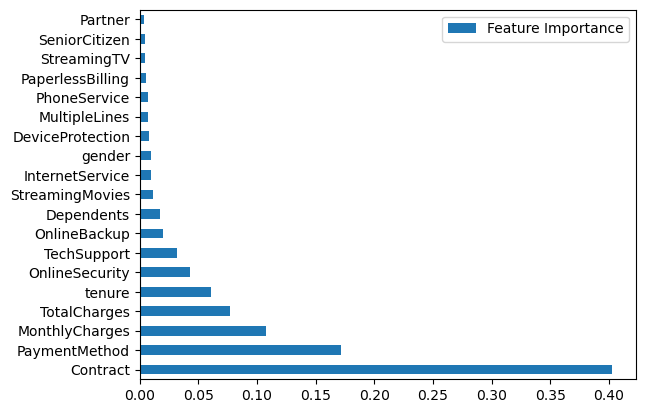

In [152]:
feature_sig.plot(kind = "barh")
plt.show()

<div style="background-color: lightblue; padding: 10px;">

## **Business Intrepretations**

1. **Contract (Highest Importance)**

* Interpretation: The type of contract (month-to-month, yearly) has the largest impact on churn, with shorter contracts leading to higher churn.

* Action: Encourage longer contracts with incentives such as discounts or loyalty rewards. Educate customers on the benefits of locking in rates or additional perks.


2. **PaymentMethod**

* Interpretation: Certain payment methods (e.g., electronic check) are associated with higher churn.

* Action: Promote secure and convenient payment options, like automated credit card payments, and offer discounts for more stable methods like direct debit.


3. **MonthlyCharges**

* Interpretation: Higher monthly charges lead to increased churn, likely due to customers feeling they aren't receiving enough value.

* Action: Offer tiered pricing plans or bundling options to provide more perceived value, and give personalized pricing options to sensitive customers.


4. **TotalCharges**

* Interpretation: Customers who have accumulated higher total charges may be more prone to churn.

* Action: Implement loyalty rewards or periodic discounts for long-term customers to show appreciation and offset the cost perception.


5. **tenure**

* Interpretation: Customers with lower tenure (newer customers) are more likely to churn.

* Action: Focus on improving the onboarding process and offer early-stage benefits like personalized support, discounts, or welcome offers.


6. **OnlineSecurity**

* Interpretation: Customers without online security services are more likely to churn.

* Action: Promote online security services, highlighting their value through free trials or bundling with other services to increase customer retention.


7. **TechSupport**

* Interpretation: Lack of tech support is associated with increased churn.

* Action: Offer accessible and affordable tech support as part of basic service plans, ensuring customers can resolve issues easily.


8. **OnlineBackup**

* Interpretation: Customers without online backup services are more likely to churn.

* Action: Upsell online backup services through bundling or free trials, emphasizing the protection it offers for customers' data.


9. **Dependents**

* Interpretation: Customers with dependents are less likely to churn, possibly due to more stable usage needs.

* Action: Introduce family or dependents-focused plans, offering tailored benefits or discounts for households to retain these customers.


10. **StreamingMovies & StreamingTV**

* Interpretation: Streaming services have a small but positive impact on retention as customers may value entertainment offerings.

* Action: Enhance streaming services with exclusive content and bundle offers to increase their attractiveness and reduce churn.


11. **InternetService**

* Interpretation: The type or quality of internet service slightly affects churn.

* Action: Ensure reliable internet service and offer a variety of speed tiers to meet different customer needs, reducing churn due to service dissatisfaction.


12. **gender**

* Interpretation: Gender has a negligible impact on churn.

* Action: Focus on providing equal value and support across all demographics without gender-specific interventions.


13. **DeviceProtection**

* Interpretation: Customers without device protection are slightly more likely to churn.

* Action: Promote device protection as an added value, potentially offering it for free for a limited time to attract and retain customers.


14. **MultipleLines**

* Interpretation: Having multiple lines has minimal impact on churn.

* Action: Offer multi-line discounts or family plans to incentivize customers to add more lines, increasing overall loyalty.


15. **PhoneService**

* Interpretation: The presence of phone service does not significantly affect churn.

* Action: Maintain competitive pricing and value for phone services, and consider bundling phone service with other offerings to add perceived value.


16. **PaperlessBilling**

* Interpretation: Paperless billing has little impact on churn.

* Action: Continue encouraging paperless billing for its operational benefits but do not prioritize it as a churn reduction strategy.


17. **SeniorCitizen**

* Interpretation: Age (being a senior citizen) has minimal impact on churn.

* Action: Offer tailored services or discounts for senior citizens to improve satisfaction, though it’s not a critical churn factor.


18. **Partner**
 
* Interpretation: Marital status (having a partner) has a very small effect on churn.

* Action: No major action required based on marital status, but marketing family or couple plans could help further reduce churn in this segment.


**General Strategy**:

Focus on contract length, payment methods, and improving the early customer experience (low-tenure) as key strategies to reduce churn. Providing value-added services like online security, backup, and tech support can also help increase loyalty, while managing price sensitivity through tailored pricing or bundling can mitigate churn risk.

### **Save the Final Model**

In [153]:
import pickle

In [154]:
# save the final model as a pickle file

with open ("final_model_bagg.pkl","wb") as file:
    pickle.dump(fin_model, file)